In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import seaborn as sns

python(20655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
train = pd.read_csv("../../data/new_imputation_train.csv")
test = pd.read_csv("../../data/new_imputation_test.csv")

In [3]:
train["bant_submit"] = train["bant_submit"] * 4
train["bant_submit"] = train["bant_submit"].astype(int)
test["bant_submit"] = test["bant_submit"] * 4
test["bant_submit"] = test["bant_submit"].astype(int)

In [4]:
train

bant_submit business_unit  customer_idx          customer_type  \
0                4            AS         32160               end-user   
1                4            AS         23122               end-user   
2                4            AS          1755               end-user   
3                4            AS          4919               end-user   
4                4            AS         17126  Specifier/ Influencer   
...            ...           ...           ...                    ...   
58295            4            AS         33747               end-user   
58296            3            AS         35420  Specifier/ Influencer   
58297            3            AS         19249  Specifier/ Influencer   
58298            4            AS         40327                    NaN   
58299            3      Solution         30268                    NaN   

       enterprise  historical_existing_cnt             customer_job  \
0               1                      NaN               purchasing   
1               1                     12.0  media and communication   
2               1                    144.0              engineering   
3               1                      NaN         entrepreneurship   
4               1                      NaN               consulting   
...           ...                      ...                      ...   
58295           0                      NaN              engineering   
58296           1                      NaN         entrepreneurship   
58297           1                      NaN              engineering   
58298           1                      NaN         entrepreneurship   
58299           1                      NaN                    other   

       lead_desc_length                        inquiry_type product_category  \
0                    62  quotation or purchase consultation           AIRCON   
1                    96  quotation or purchase consultation           AIRCON   
2                    56                 product information           AIRCON   
3                    44  quotation or purchase consultation              VRF   
4                    97  quotation or purchase consultation           AIRCON   
...                 ...                                 ...              ...   
58295               200                 product information              VRF   
58296                70                                 NaN              O/W   
58297                34                                 NaN           AIRCON   
58298               377  quotation or purchase consultation              O/W   
58299                78  quotation or purchase consultation           AIRCON   

      customer_position response_corporate    expected_timeline  \
0           entry level              LGEPH   less than 3 months   
1         ceo / founder              LGEPH   less than 3 months   
2               partner              LGEIL   less than 3 months   
3         ceo / founder              LGEIL   less than 3 months   
4               partner              LGEIL   less than 3 months   
...                 ...                ...                  ...   
58295       entry level              LGEPL  3 months ~ 6 months   
58296           trainee              LGECB    9 months ~ 1 year   
58297       entry level              LGEPR   less than 3 months   
58298            others              LGEPR     more than a year   
58299     ceo / founder              LGEKR   less than 3 months   

            business_area business_subarea  lead_owner  is_converted  \
0      corporate / office      Engineering           0          True   
1      corporate / office      Advertising           1          True   
2      corporate / office     Construction           2          True   
3      corporate / office      IT/Software           3          True   
4      corporate / office              NaN           4          True   
...                   ...              ...         ...           ...   
58295  

In [5]:
test

id  bant_submit business_unit  customer_idx          customer_type  \
0     19844            0            ID         47466               end-user   
1      9738            1            IT          5405               end-user   
2      8491            4            ID         13597  Specifier/ Influencer   
3     19895            2            ID         17204                    NaN   
4     10465            4            ID          2329               end-user   
...     ...          ...           ...           ...                    ...   
5266  13855            2            AS         40292                    NaN   
5267   7979            1            IT         47466                    NaN   
5268  12887            3            AS         46227  Specifier/ Influencer   
5269  17530            0            IT         45667               end-user   
5270   4330            1            AS         23646               end-user   

      enterprise  historical_existing_cnt            customer_job  \
0              1                     53.0              consulting   
1              0                      NaN                     NaN   
2              0                      NaN  information technology   
3              1                      NaN                   sales   
4              1                      2.0             engineering   
...          ...                      ...                     ...   
5266           1                     10.0                   sales   
5267           1                      0.0                     NaN   
5268           1                      NaN        entrepreneurship   
5269           0                      NaN                     NaN   
5270           1                      NaN                     NaN   

      lead_desc_length                        inquiry_type product_category  \
0                    3                                 NaN    NOT-AVAILABLE   
1                   23  Quotation or Purchase Consultation    NOT-AVAILABLE   
2                  138  Quotation or Purchase Consultation               TV   
3                    3  Quotation or Purchase Consultation    NOT-AVAILABLE   
4                  107  Quotation or Purchase Consultation          SIGNAGE   
...                ...                                 ...              ...   
5266                 7  Quotation or Purchase Consultation    NOT-AVAILABLE   
5267               157  Quotation or Purchase Consultation    NOT-AVAILABLE   
5268                39                                 NaN           AIRCON   
5269                 3                                 NaN         SOFTWARE   
5270                42  Quotation or Purchase Consultation           AIRCON   

      customer_position response_corporate   expected_timeline  \
0                  none              LGESP             Unknown   
1                  none              LGEUS             Unknown   
2               manager              LGEGF  less than 3 months   
3                  none              LGEUS    more than a year   
4                others              LGESP  less than 3 months   
...                 ...                ...                 ...   
5266  associate/analyst              LGESP             Unknown   
5267               none              LGEUS             Unknown   
5268            manager              LGESP  less than 3 months   
5269               none              LGEDG             Unknown   
5270               none              LGEIL             Unknown   

               business_area     business_subarea  lead_owner  is_converted  \
0                     retail  Electronics & Telco         278           NaN   
1             transportation               Others         437           NaN   
2     hospital & health care     General Hospital         874           NaN   
3                     retail                  NaN         194           NaN   
4         corporate / office          Engineering         167           NaN   
...            

In [6]:
def wrangiling(data_set):
    print("==================")
    print("       Shape      ")
    print("==================")

    display(data_set.shape)

    print("==================")
    print("        Info      ")
    print("==================")

    display(data_set.info())

    print("==================")
    print("      Columns     ")
    print("==================")
    
    display(data_set.columns)

    print("==================")
    print("        NaN       ")
    print("==================")

    display(data_set.isna().sum())

    print("==================")
    print("     Duplicated   ")
    print("==================")
    
    display(data_set[data_set.duplicated()])

    print("==================")
    print("    Description   ")
    print("==================")

    display(data_set.describe())

    print("==================")
    print("      Unique      ")
    print("==================")

    display(data_set.nunique())

In [7]:
wrangiling(train)

       Shape      


(58300, 18)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58300 entries, 0 to 58299
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              58300 non-null  int64  
 1   business_unit            58300 non-null  object 
 2   customer_idx             58300 non-null  int64  
 3   customer_type            14833 non-null  object 
 4   enterprise               58300 non-null  int64  
 5   historical_existing_cnt  13568 non-null  float64
 6   customer_job             39447 non-null  object 
 7   lead_desc_length         58300 non-null  int64  
 8   inquiry_type             57368 non-null  object 
 9   product_category         58300 non-null  object 
 10  customer_position        58300 non-null  object 
 11  response_corporate       58300 non-null  object 
 12  expected_timeline        58300 non-null  object 
 13  business_area            18233 non-null  object 
 14  bus

None

      Columns     


Index(['bant_submit', 'business_unit', 'customer_idx', 'customer_type',
       'enterprise', 'historical_existing_cnt', 'customer_job',
       'lead_desc_length', 'inquiry_type', 'product_category',
       'customer_position', 'response_corporate', 'expected_timeline',
       'business_area', 'business_subarea', 'lead_owner', 'is_converted',
       'customer_country3'],
      dtype='object')

        NaN       


bant_submit                    0
business_unit                  0
customer_idx                   0
customer_type              43467
enterprise                     0
historical_existing_cnt    44732
customer_job               18853
lead_desc_length               0
inquiry_type                 932
product_category               0
customer_position              0
response_corporate             0
expected_timeline              0
business_area              40067
business_subarea           52783
lead_owner                     0
is_converted                   0
customer_country3              0
dtype: int64

     Duplicated   


bant_submit business_unit  customer_idx          customer_type  \
318              4            AS         27309               end-user   
320              4            AS         30958               end-user   
321              4            AS         30958               end-user   
322              4            AS         30958               end-user   
327              4            AS          6634               end-user   
...            ...           ...           ...                    ...   
58279            4            AS         10014               end-user   
58287            2            AS         32711               end-user   
58289            2            AS         39251  Specifier/ Influencer   
58291            3            AS          6739  Specifier/ Influencer   
58295            4            AS         33747               end-user   

       enterprise  historical_existing_cnt            customer_job  \
318             0                      NaN  information technology   
320             0                      NaN    business development   
321             0                      NaN    business development   
322             0                      NaN    business development   
327             1                      NaN              purchasing   
...           ...                      ...                     ...   
58279           0                      NaN             engineering   
58287           1                      NaN             engineering   
58289           1                      NaN             engineering   
58291           0                      NaN             engineering   
58295           0                      NaN             engineering   

       lead_desc_length                        inquiry_type product_category  \
318                  17  quotation or purchase consultation           AIRCON   
320                 302  quotation or purchase consultation              O/W   
321                 302  quotation or purchase consultation              O/W   
322                 302  quotation or purchase consultation              O/W   
327                 103  quotation or purchase consultation              O/W   
...                 ...                                 ...              ...   
58279               244  quotation or purchase consultation          CHILLER   
58287                76  quotation or purchase consultation              VRF   
58289               203  quotation or purchase consultation              O/W   
58291               226  quotation or purchase consultation           AIRCON   
58295               200                 product information              VRF   

       customer_position response_corporate    expected_timeline  \
318    c-level executive              LGESP  3 months ~ 6 months   
320              manager              LGESA     more than a year   
321              manager              LGESA     more than a year   
322              manager              LGESA     more than a year   
327              manager              LGEPH   less than 3 months   
...                  ...                ...                  ...   
58279  associate/analyst              LGESP     more than a year   
58287  associate/analyst              LGESP              Unknown   
58289            partner              LGESP              Unknown   
58291        entry level              LGEPL   less than 3 months   
58295        entry level              LGEPL  3 months ~ 6 months   

            business_area business_subarea  lead_owner  is_converted  \
318    corporate / office      IT/Software          97         False   
320    corporate / office      IT/Software          26         False   
321    corporate / office      IT/Software          26         False   
322    corporate / office      IT/Software          26         False   
327    corporate / office              NaN         119         False   
...                   ...              ...         ...           ...   
58279  

    Description   


bant_submit  customer_idx    enterprise  historical_existing_cnt  \
count  58300.000000  58300.000000  58300.000000             13568.000000   
mean       2.539520  27157.431475      0.642607                19.896079   
std        1.148534  14662.321032      0.479236                44.494914   
min        0.000000      2.000000      0.000000                 0.000000   
25%        2.000000  14956.750000      0.000000                 1.000000   
50%        2.000000  26814.500000      1.000000                 4.000000   
75%        4.000000  40444.000000      1.000000                19.000000   
max        4.000000  47466.000000      1.000000              1394.000000   

       lead_desc_length    lead_owner  
count      58300.000000  58300.000000  
mean          79.162144    262.313928  
std          132.343998    232.462500  
min            1.000000      0.000000  
25%            8.000000     97.000000  
50%           29.000000    175.000000  
75%           91.000000    374.000000  
max         1264.000000   1114.000000

      Unique      


bant_submit                    5
business_unit                  4
customer_idx               34355
customer_type                  6
enterprise                     2
historical_existing_cnt      136
customer_job                  37
lead_desc_length             905
inquiry_type                  16
product_category              18
customer_position             14
response_corporate            52
expected_timeline              6
business_area                 12
business_subarea              86
lead_owner                   984
is_converted                   2
customer_country3            157
dtype: int64

In [8]:
wrangiling(test)

       Shape      


(5271, 19)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   int64  
 2   business_unit            5271 non-null   object 
 3   customer_idx             5271 non-null   int64  
 4   customer_type            3814 non-null   object 
 5   enterprise               5271 non-null   int64  
 6   historical_existing_cnt  1275 non-null   float64
 7   customer_job             3832 non-null   object 
 8   lead_desc_length         5271 non-null   int64  
 9   inquiry_type             3979 non-null   object 
 10  product_category         5271 non-null   object 
 11  customer_position        5271 non-null   object 
 12  response_corporate       5271 non-null   object 
 13  expected_timeline        5271 non-null   object 
 14  busin

None

      Columns     


Index(['id', 'bant_submit', 'business_unit', 'customer_idx', 'customer_type',
       'enterprise', 'historical_existing_cnt', 'customer_job',
       'lead_desc_length', 'inquiry_type', 'product_category',
       'customer_position', 'response_corporate', 'expected_timeline',
       'business_area', 'business_subarea', 'lead_owner', 'is_converted',
       'customer_country3'],
      dtype='object')

        NaN       


id                            0
bant_submit                   0
business_unit                 0
customer_idx                  0
customer_type              1457
enterprise                    0
historical_existing_cnt    3996
customer_job               1439
lead_desc_length              0
inquiry_type               1292
product_category              0
customer_position             0
response_corporate            0
expected_timeline             0
business_area              2898
business_subarea           3455
lead_owner                    0
is_converted               5271
customer_country3             0
dtype: int64

     Duplicated   


Empty DataFrame
Columns: [id, bant_submit, business_unit, customer_idx, customer_type, enterprise, historical_existing_cnt, customer_job, lead_desc_length, inquiry_type, product_category, customer_position, response_corporate, expected_timeline, business_area, business_subarea, lead_owner, is_converted, customer_country3]
Index: []

    Description   


id  bant_submit  customer_idx   enterprise  \
count   5271.000000  5271.000000   5271.000000  5271.000000   
mean   10686.395940     2.422880  24664.497629     0.585278   
std     6141.012698     1.462524  14615.896802     0.492721   
min        1.000000     0.000000      1.000000     0.000000   
25%     5644.000000     1.000000  11173.500000     0.000000   
50%    10067.000000     2.000000  24151.000000     1.000000   
75%    16019.500000     4.000000  37680.000000     1.000000   
max    21340.000000     4.000000  47466.000000     1.000000   

       historical_existing_cnt  lead_desc_length   lead_owner  is_converted  
count              1275.000000       5271.000000  5271.000000           0.0  
mean                 21.272941         81.816164   304.458736           NaN  
std                  75.187401        135.063265   241.502331           NaN  
min                   0.000000          1.000000     0.000000           NaN  
25%                   0.000000          3.000000    97.000000           NaN  
50%                   4.000000         26.000000   231.000000           NaN  
75%                  19.000000        104.000000   428.000000           NaN  
max                2219.000000       1143.000000  1108.000000           NaN

      Unique      


id                         5271
bant_submit                   5
business_unit                 3
customer_idx               4069
customer_type                 5
enterprise                    2
historical_existing_cnt      74
customer_job                 37
lead_desc_length            481
inquiry_type                 12
product_category             18
customer_position            14
response_corporate           41
expected_timeline             6
business_area                12
business_subarea             80
lead_owner                  440
is_converted                  0
customer_country3            82
dtype: int64

In [13]:
train.drop_duplicates(inplace=True)

In [14]:
train

bant_submit business_unit  customer_idx          customer_type  \
0                4            AS         32160               end-user   
1                4            AS         23122               end-user   
2                4            AS          1755               end-user   
3                4            AS          4919               end-user   
4                4            AS         17126  Specifier/ Influencer   
...            ...           ...           ...                    ...   
58294            4            AS         33747               end-user   
58296            3            AS         35420  Specifier/ Influencer   
58297            3            AS         19249  Specifier/ Influencer   
58298            4            AS         40327                    NaN   
58299            3      Solution         30268                    NaN   

       enterprise  historical_existing_cnt             customer_job  \
0               1                      NaN               purchasing   
1               1                     12.0  media and communication   
2               1                    144.0              engineering   
3               1                      NaN         entrepreneurship   
4               1                      NaN               consulting   
...           ...                      ...                      ...   
58294           0                      NaN              engineering   
58296           1                      NaN         entrepreneurship   
58297           1                      NaN              engineering   
58298           1                      NaN         entrepreneurship   
58299           1                      NaN                    other   

       lead_desc_length                        inquiry_type product_category  \
0                    62  quotation or purchase consultation           AIRCON   
1                    96  quotation or purchase consultation           AIRCON   
2                    56                 product information           AIRCON   
3                    44  quotation or purchase consultation              VRF   
4                    97  quotation or purchase consultation           AIRCON   
...                 ...                                 ...              ...   
58294               200                 product information              VRF   
58296                70                                 NaN              O/W   
58297                34                                 NaN           AIRCON   
58298               377  quotation or purchase consultation              O/W   
58299                78  quotation or purchase consultation           AIRCON   

      customer_position response_corporate    expected_timeline  \
0           entry level              LGEPH   less than 3 months   
1         ceo / founder              LGEPH   less than 3 months   
2               partner              LGEIL   less than 3 months   
3         ceo / founder              LGEIL   less than 3 months   
4               partner              LGEIL   less than 3 months   
...                 ...                ...                  ...   
58294       entry level              LGEPL  3 months ~ 6 months   
58296           trainee              LGECB    9 months ~ 1 year   
58297       entry level              LGEPR   less than 3 months   
58298            others              LGEPR     more than a year   
58299     ceo / founder              LGEKR   less than 3 months   

            business_area business_subarea  lead_owner  is_converted  \
0      corporate / office      Engineering           0          True   
1      corporate / office      Advertising           1          True   
2      corporate / office     Construction           2          True   
3      corporate / office      IT/Software           3          True   
4      corporate / office              NaN           4          True   
...                   ...              ...         ...           ...   
58294  

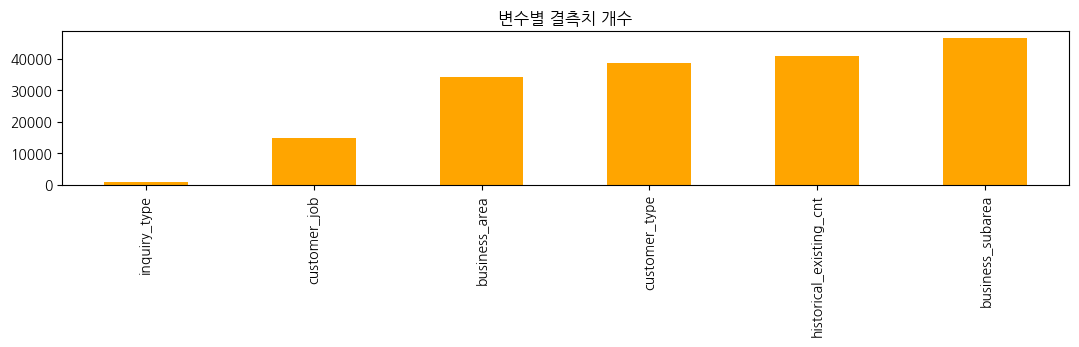

In [15]:
# 변수별 결측치의 개수을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 개수')
plt.show()

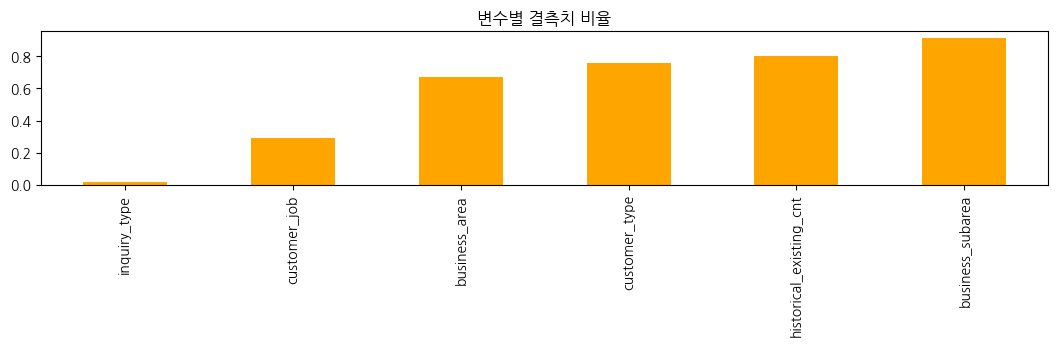

In [16]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum() / train.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

<Axes: xlabel='bant_submit', ylabel='count'>

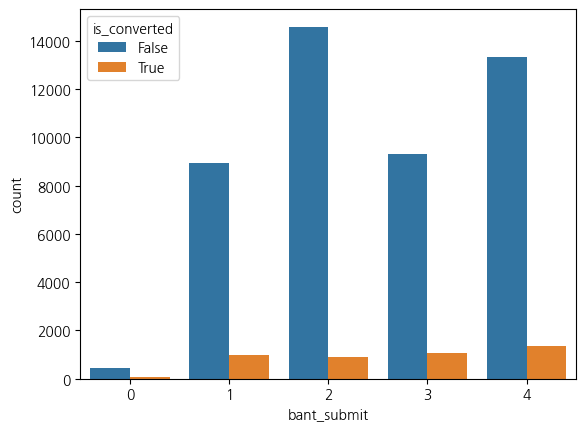

In [17]:
sns.countplot(train, x="bant_submit", hue="is_converted")

In [18]:
train["bant_submit"].value_counts()

bant_submit
2    15488
4    14701
3    10395
1     9902
0      502
Name: count, dtype: int64

In [24]:
train[["bant_submit", "is_converted"]].value_counts()/train["bant_submit"].value_counts()*100

bant_submit  is_converted
2            False           94.208419
4            False           90.674104
3            False           89.648870
1            False           90.254494
4            True             9.325896
3            True            10.351130
1            True             9.745506
2            True             5.791581
0            False           84.462151
             True            15.537849
Name: count, dtype: float64

In [25]:
train[["bant_submit", "is_converted"]].value_counts()/len(train)*100

bant_submit  is_converted
2            False           28.616537
4            False           26.143406
3            False           18.276849
1            False           17.527654
4            True             2.688868
3            True             2.110300
1            True             1.892602
2            True             1.759237
0            False            0.831568
             True             0.152977
Name: count, dtype: float64

<Axes: xlabel='bant_submit', ylabel='count'>

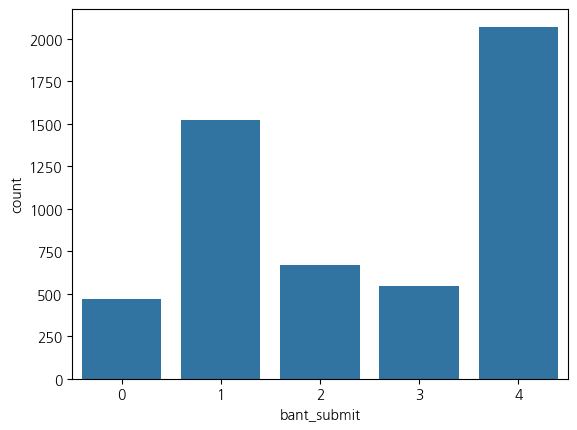

In [26]:
sns.countplot(test, x="bant_submit")

In [27]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
unique_list

array([0, 1, 2, 3, 4])

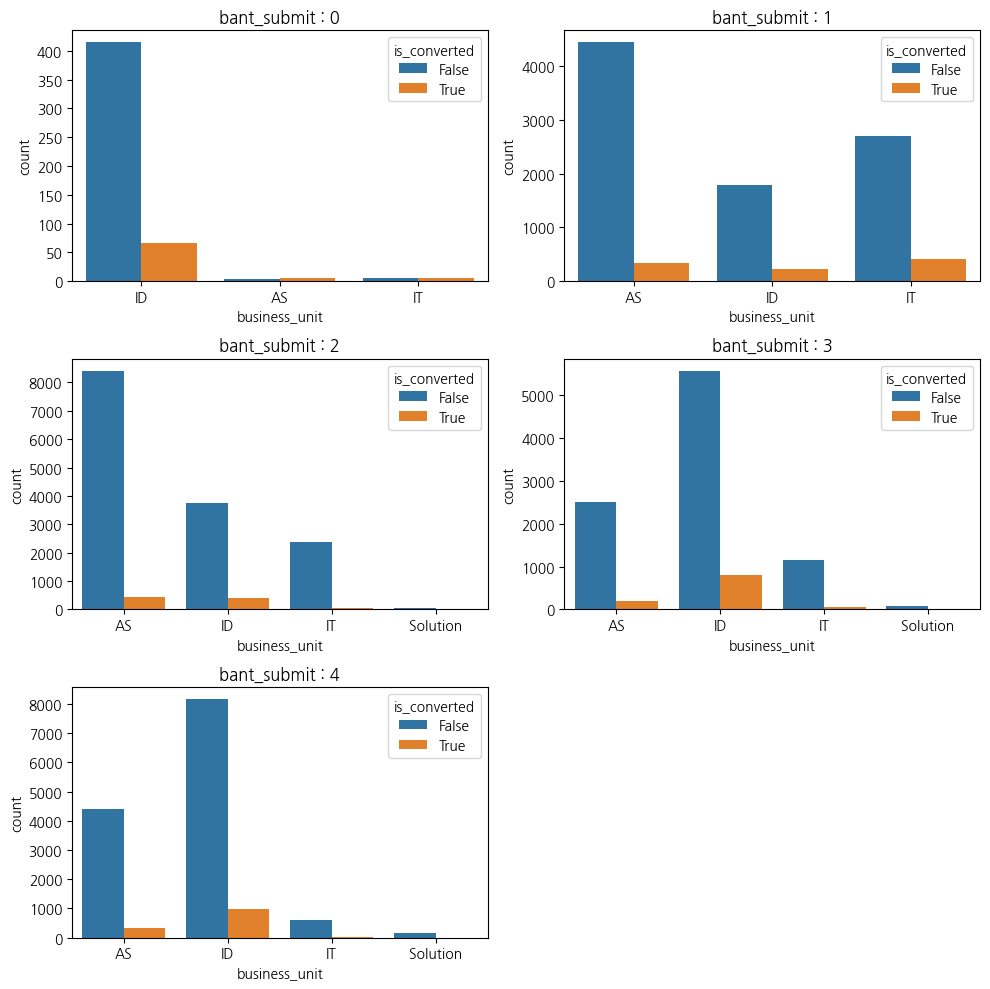

In [28]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="business_unit", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

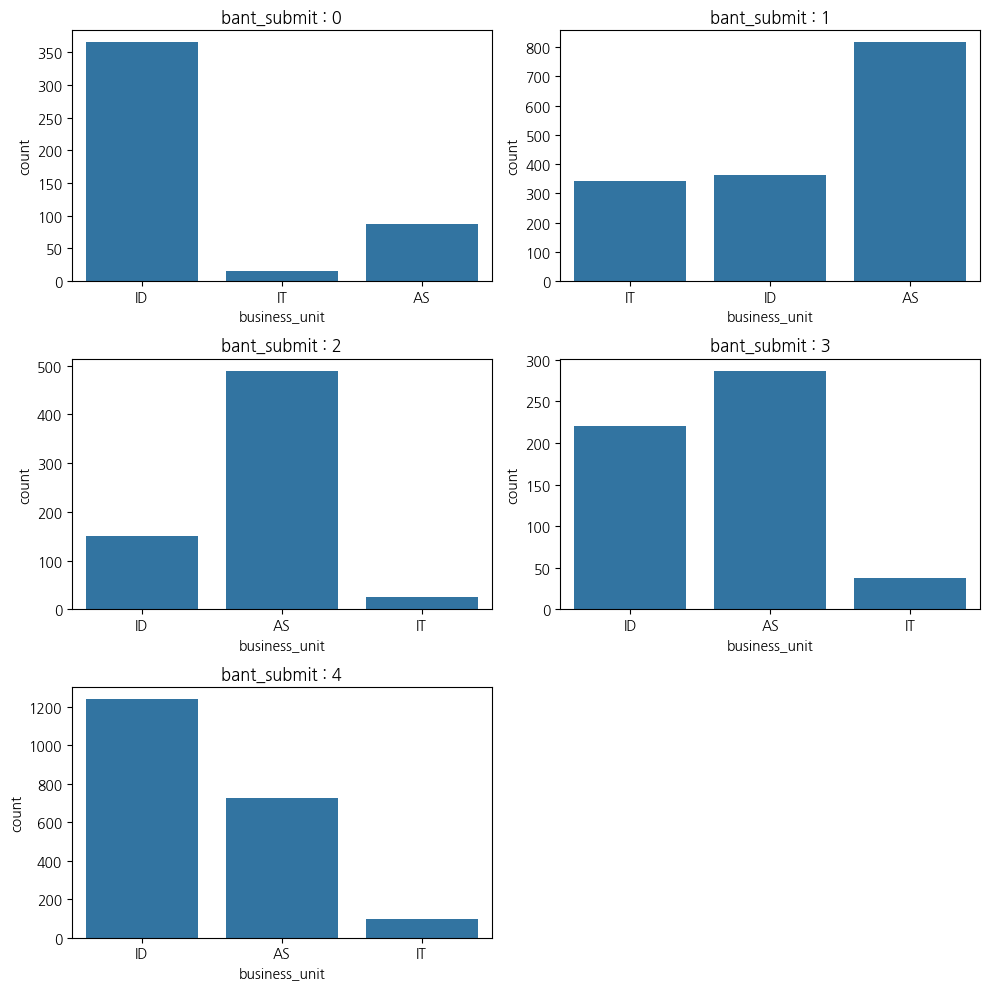

In [29]:
unique_list = test["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(test[test["bant_submit"]==uni], x="business_unit", ax=ax)
    ax.set_title(f"bant_submit : {uni}")

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/1511939083.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/1511939083.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/1511939083.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/1511939083.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

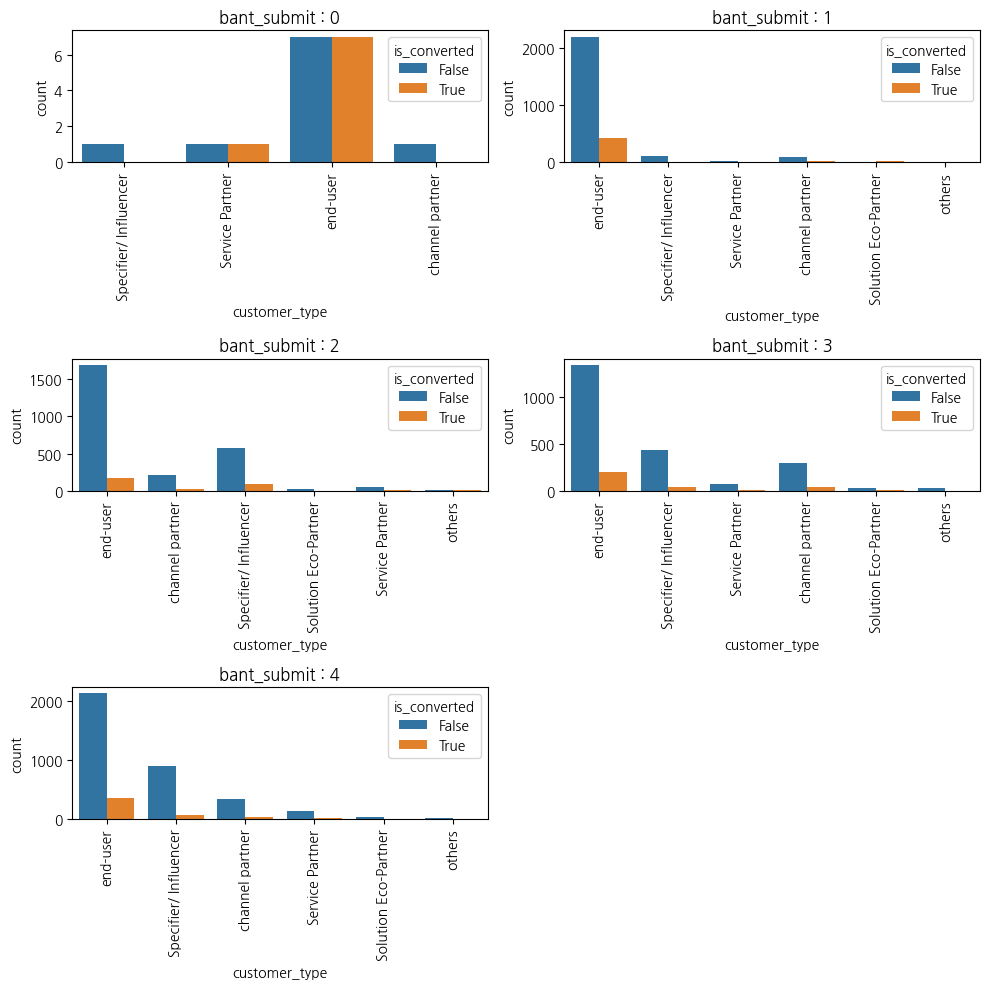

In [30]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="customer_type", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    


# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/504153058.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/504153058.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/504153058.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/504153058.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

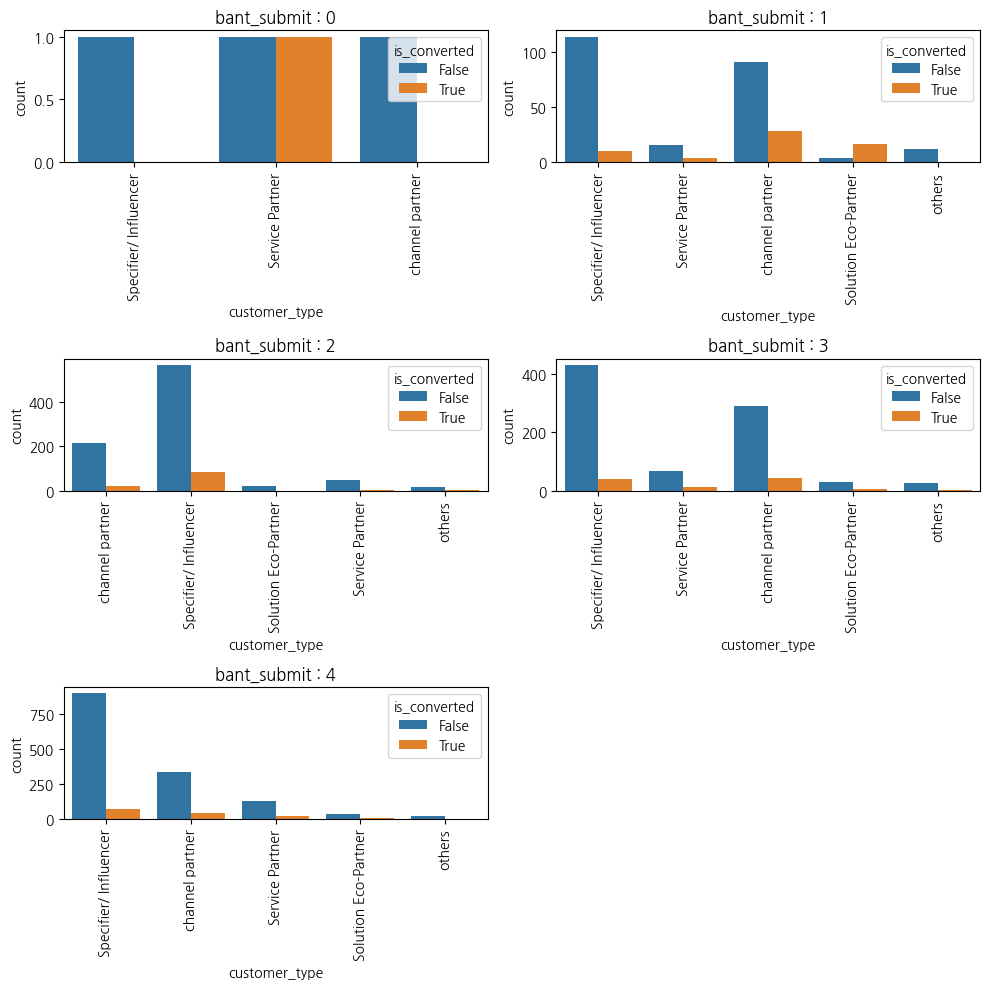

In [31]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[(train["bant_submit"]==uni) & (train["customer_type"]!="end-user")], x="customer_type", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    


# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2812097888.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2812097888.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2812097888.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2812097888.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

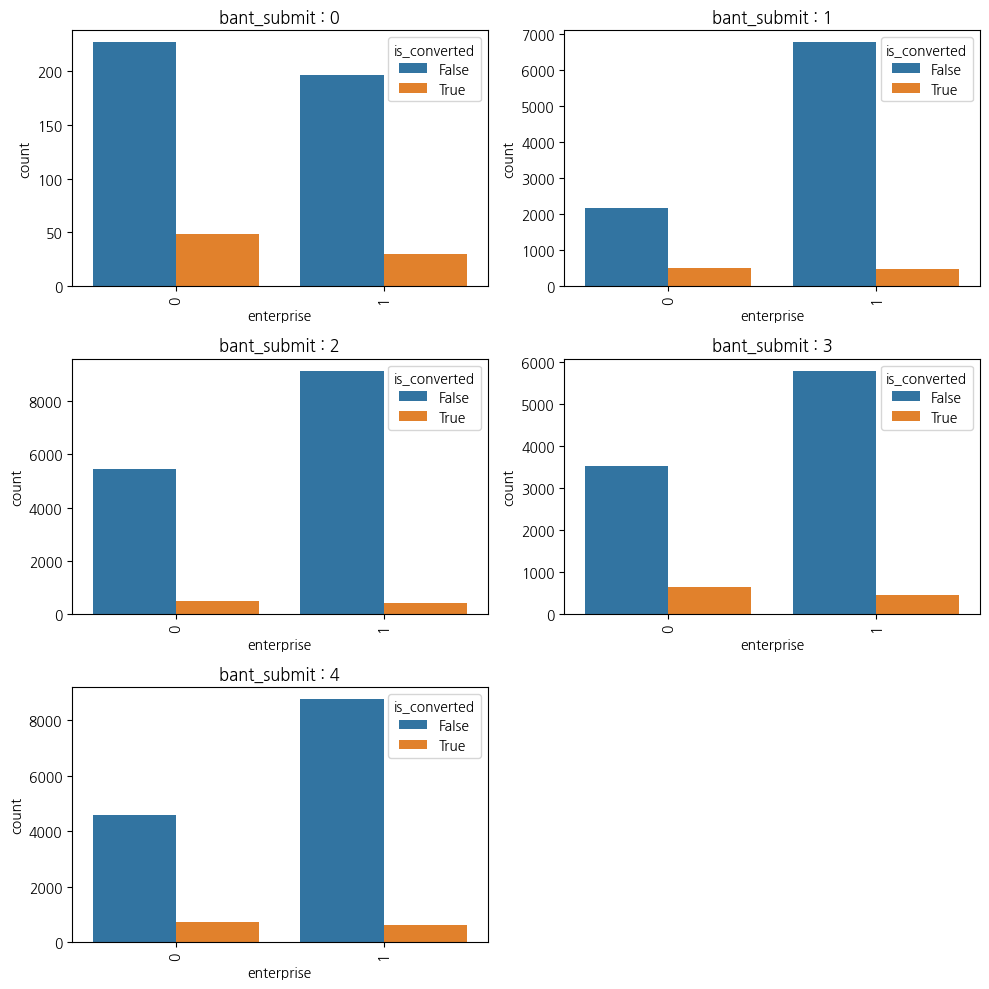

In [32]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="enterprise", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    


# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/636927141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/636927141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/636927141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/636927141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

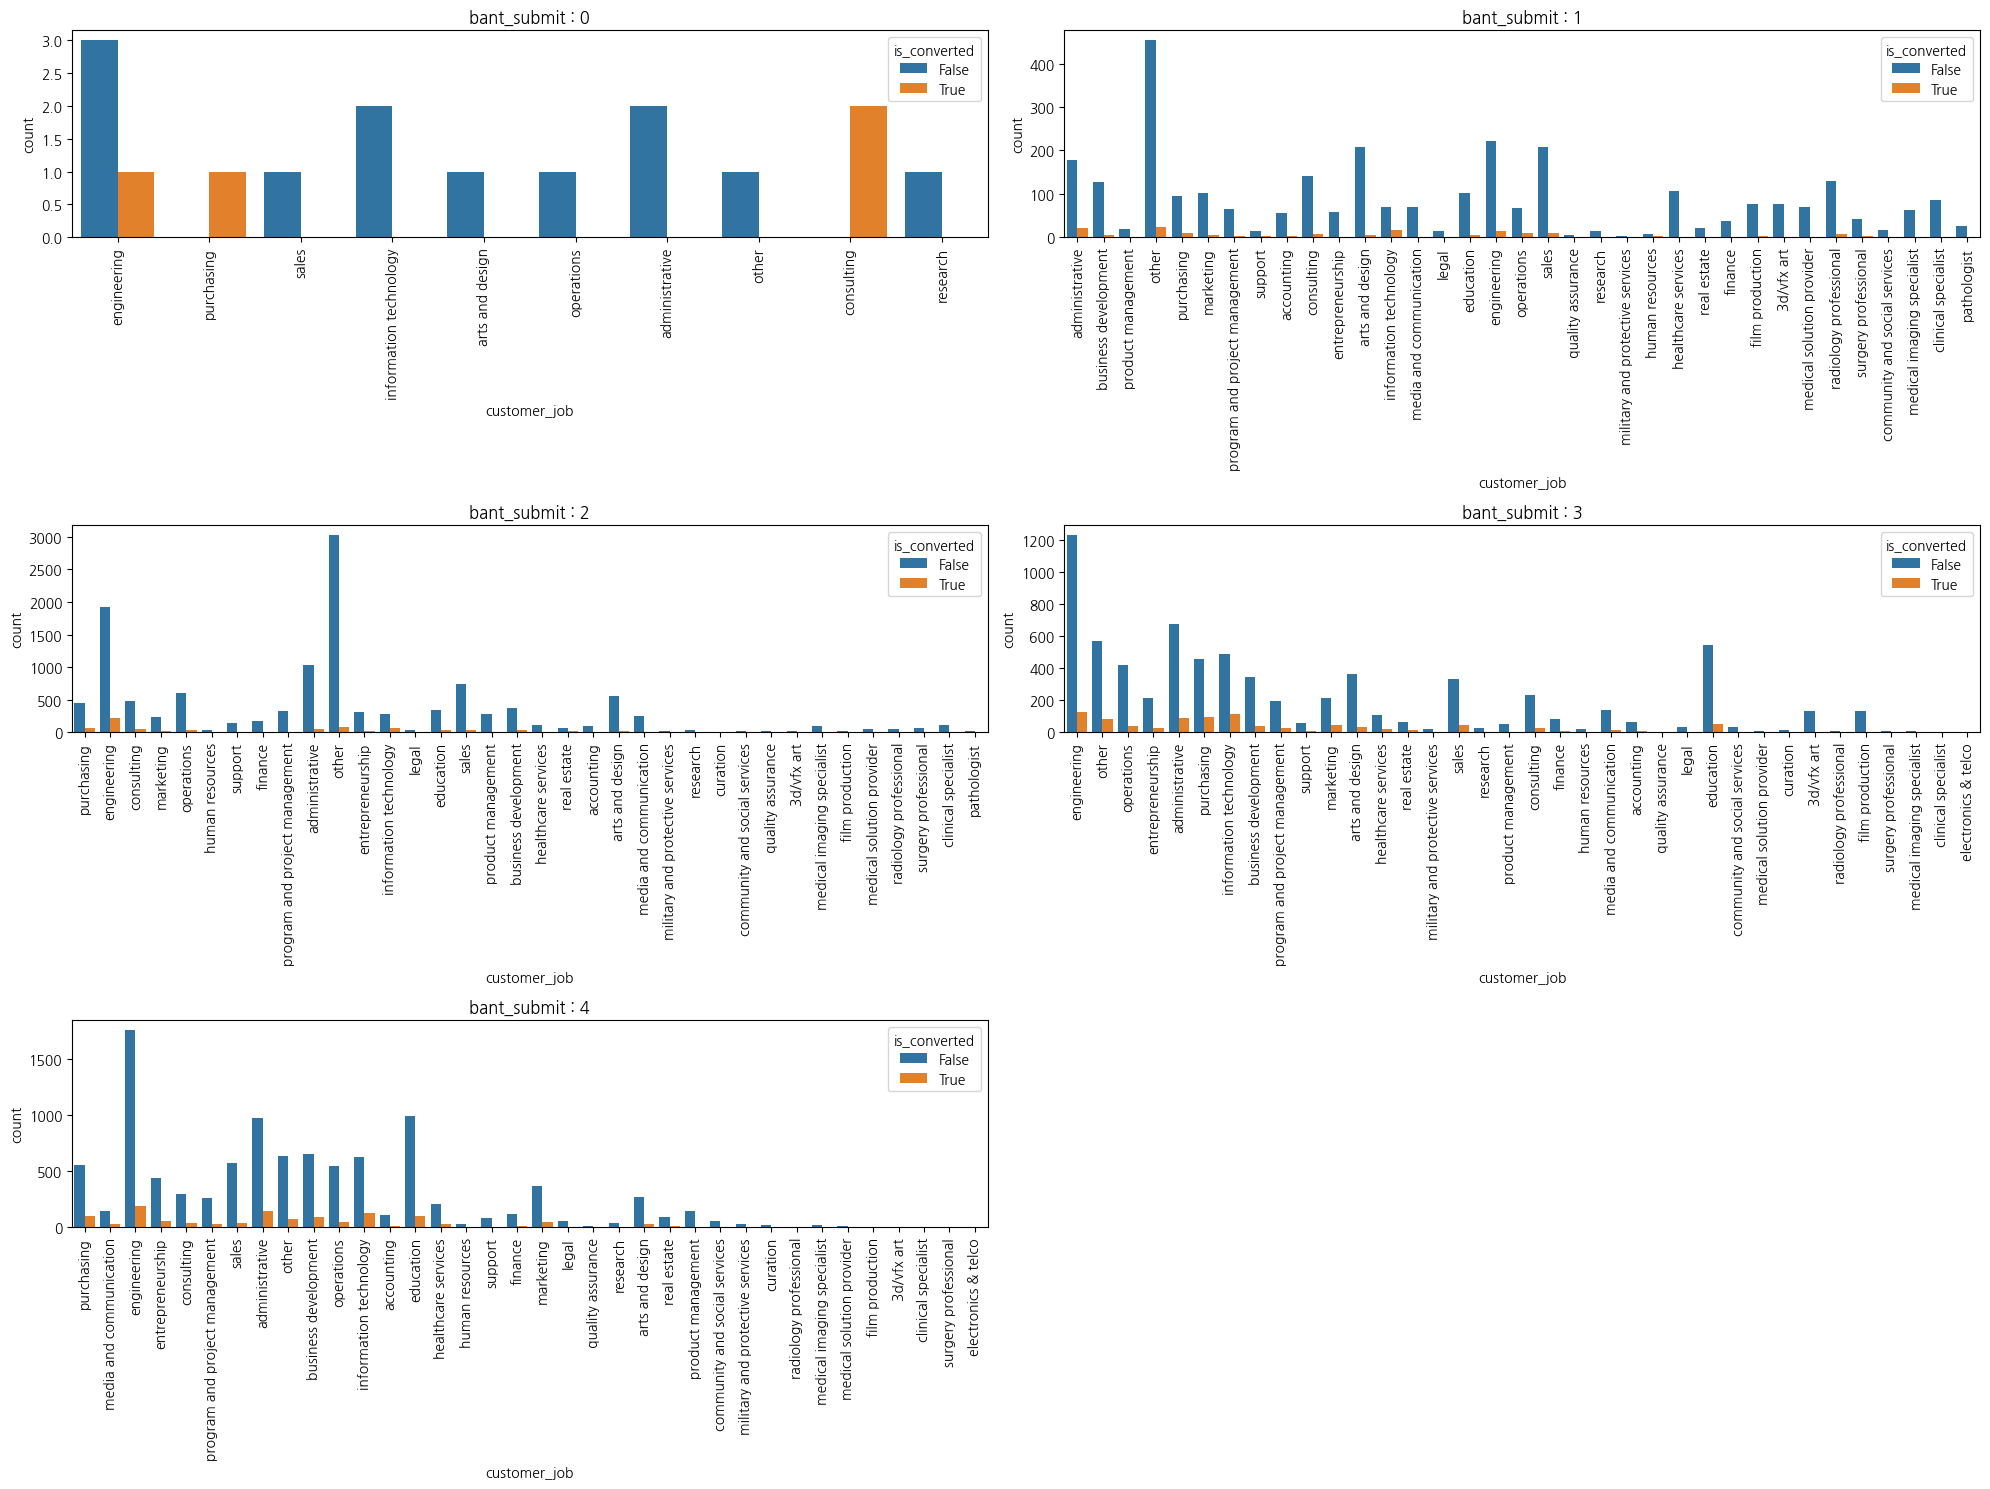

In [33]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="customer_job", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/180612684.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/180612684.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/180612684.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/180612684.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

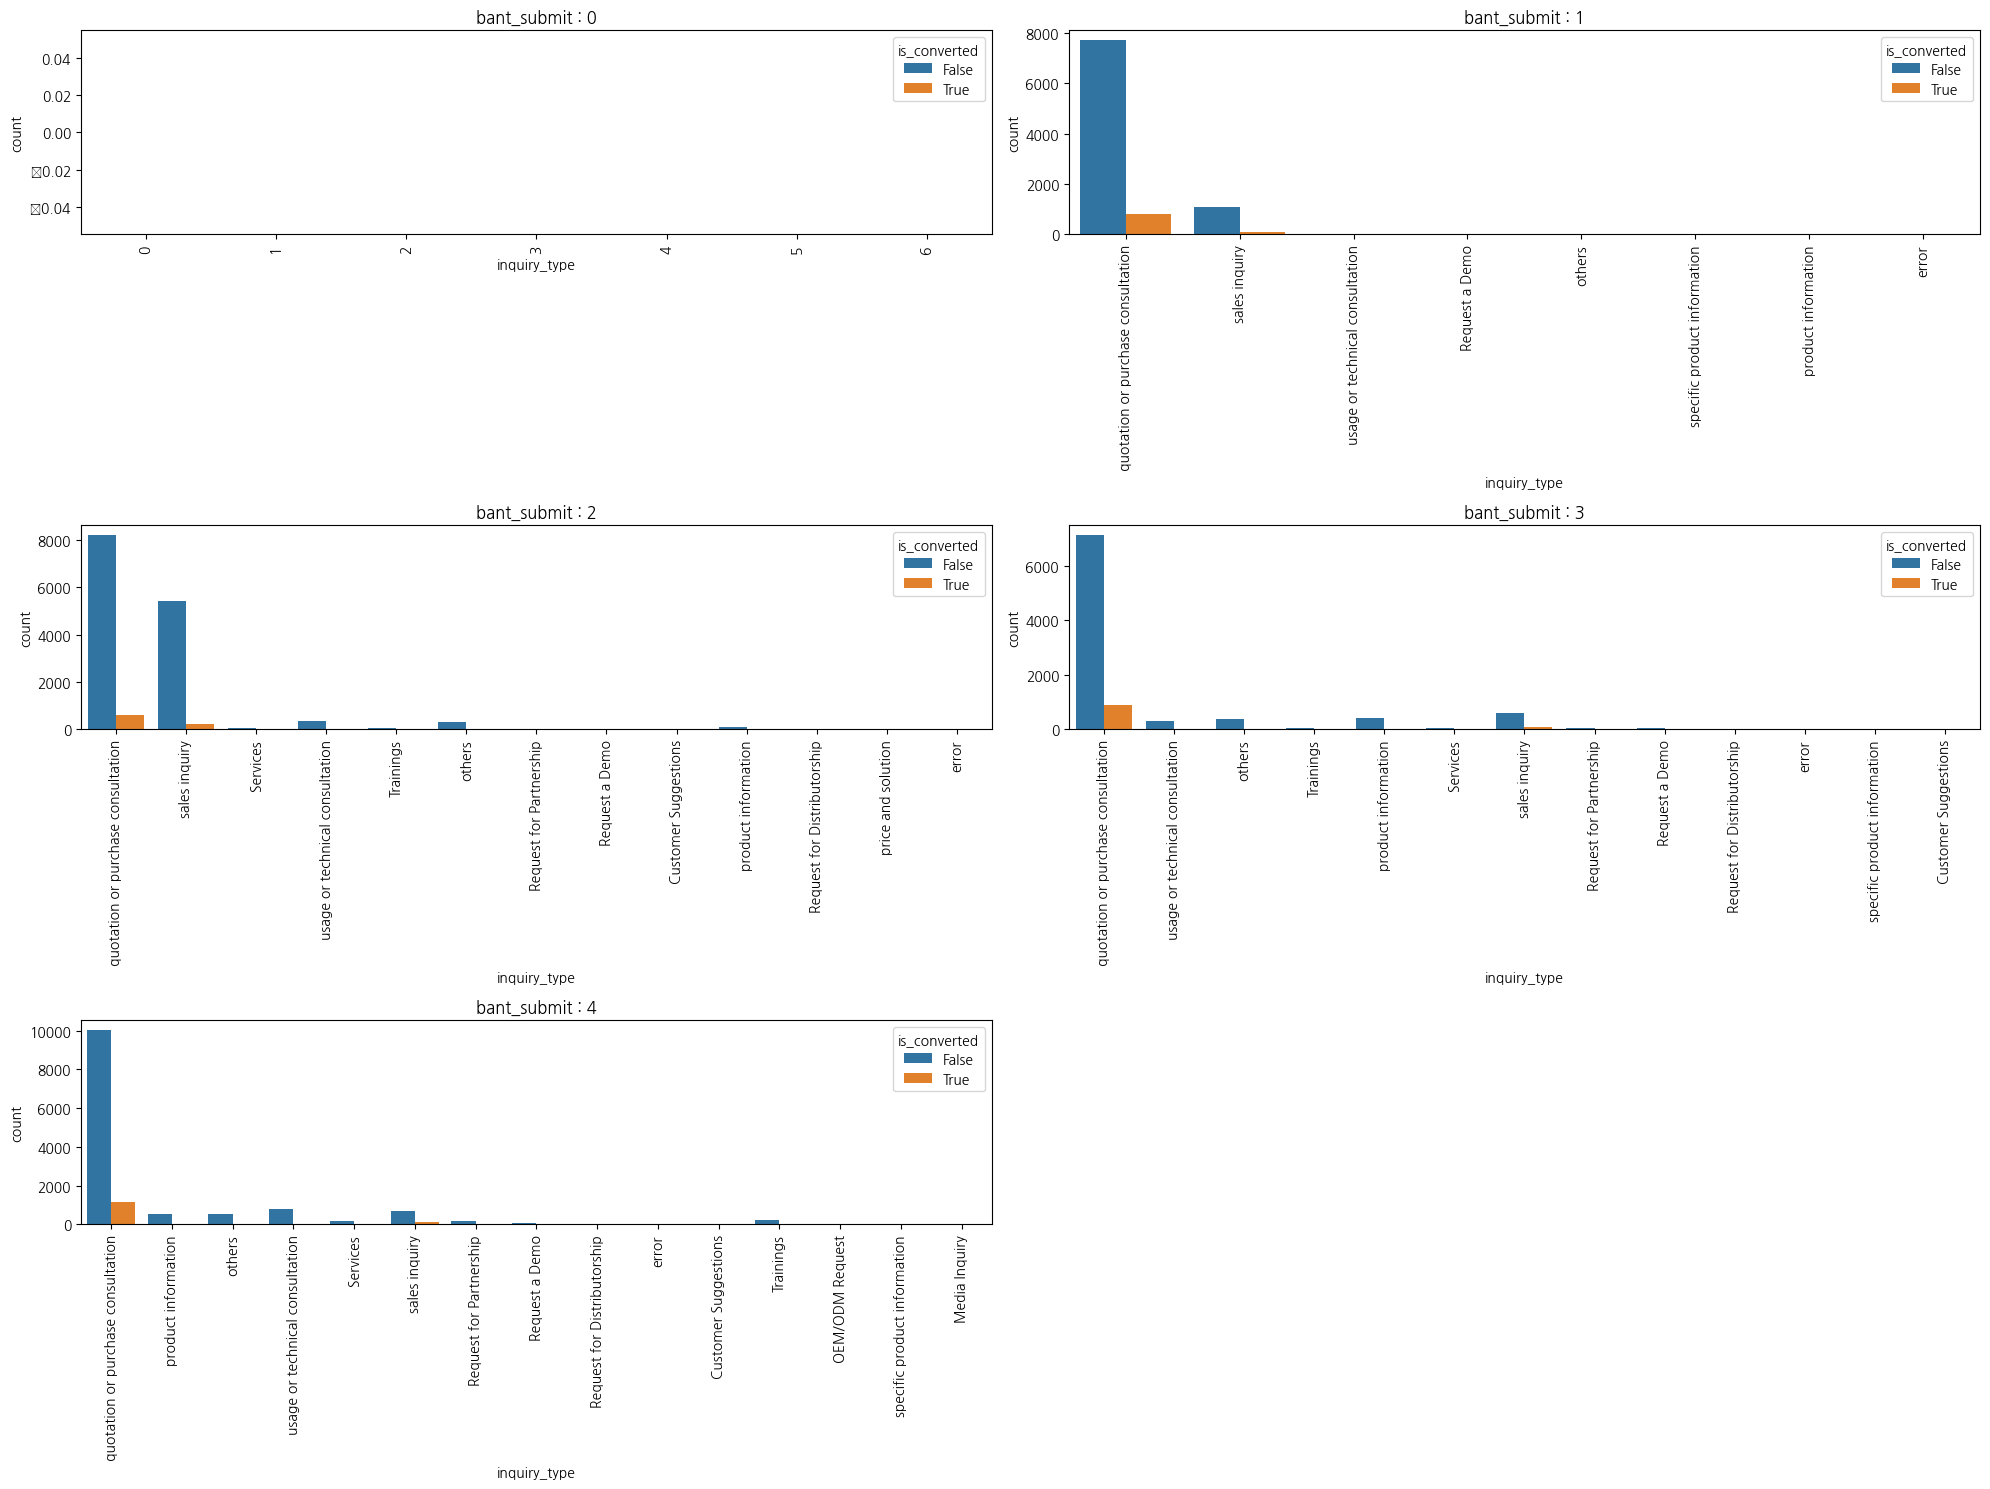

In [34]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="inquiry_type", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/863413641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/863413641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/863413641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/863413641.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

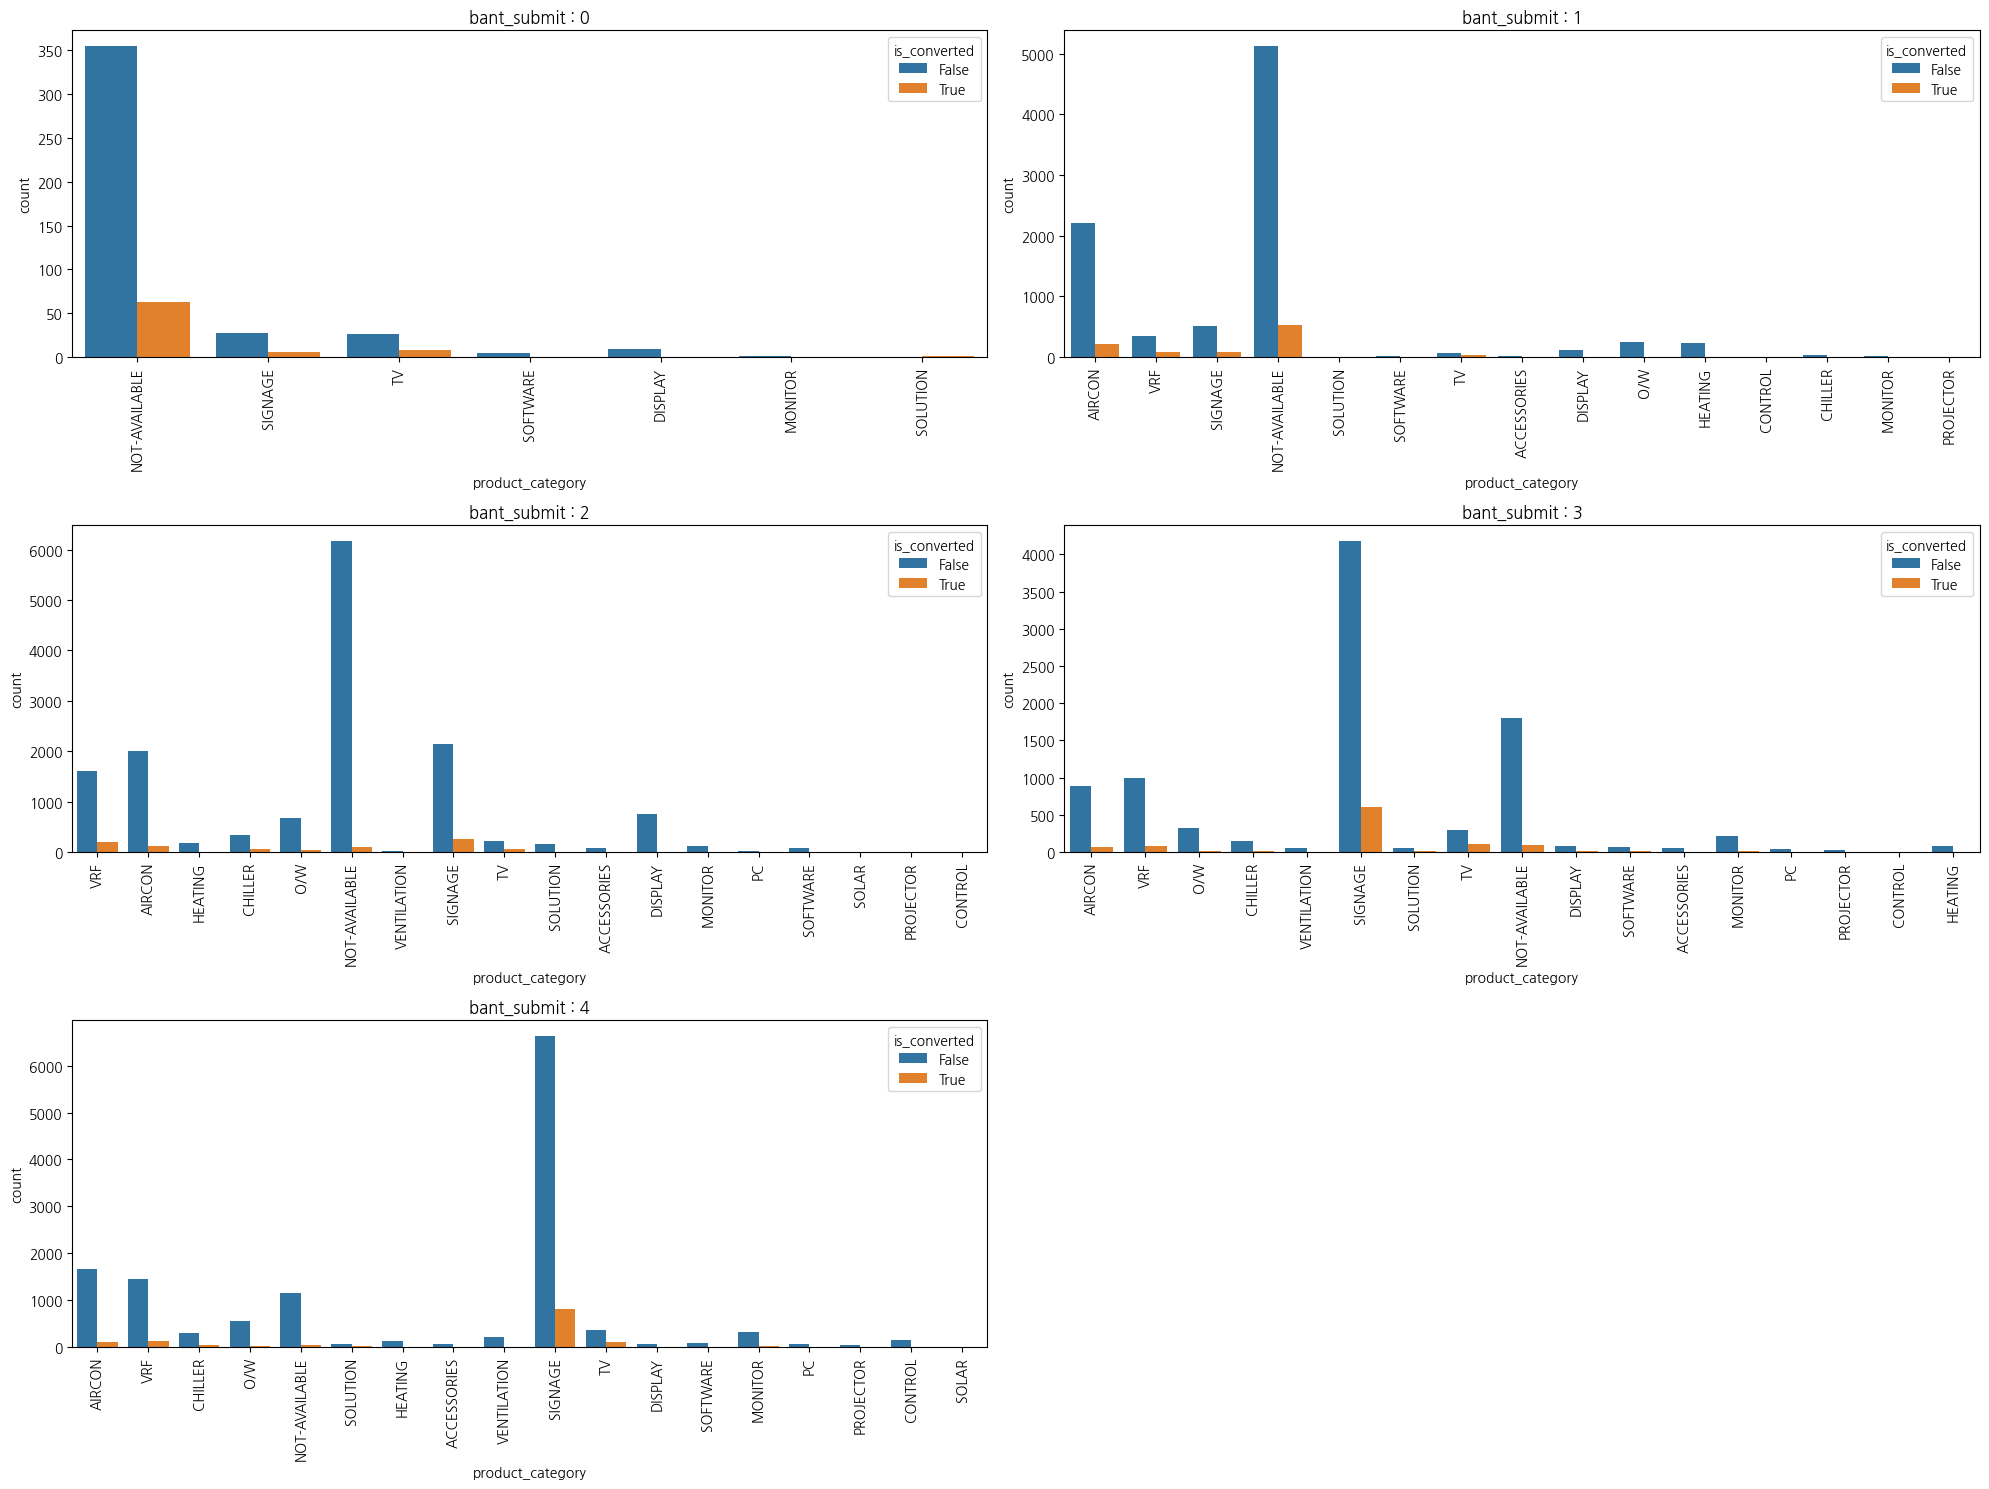

In [35]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="product_category", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/619464355.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/619464355.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/619464355.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/619464355.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

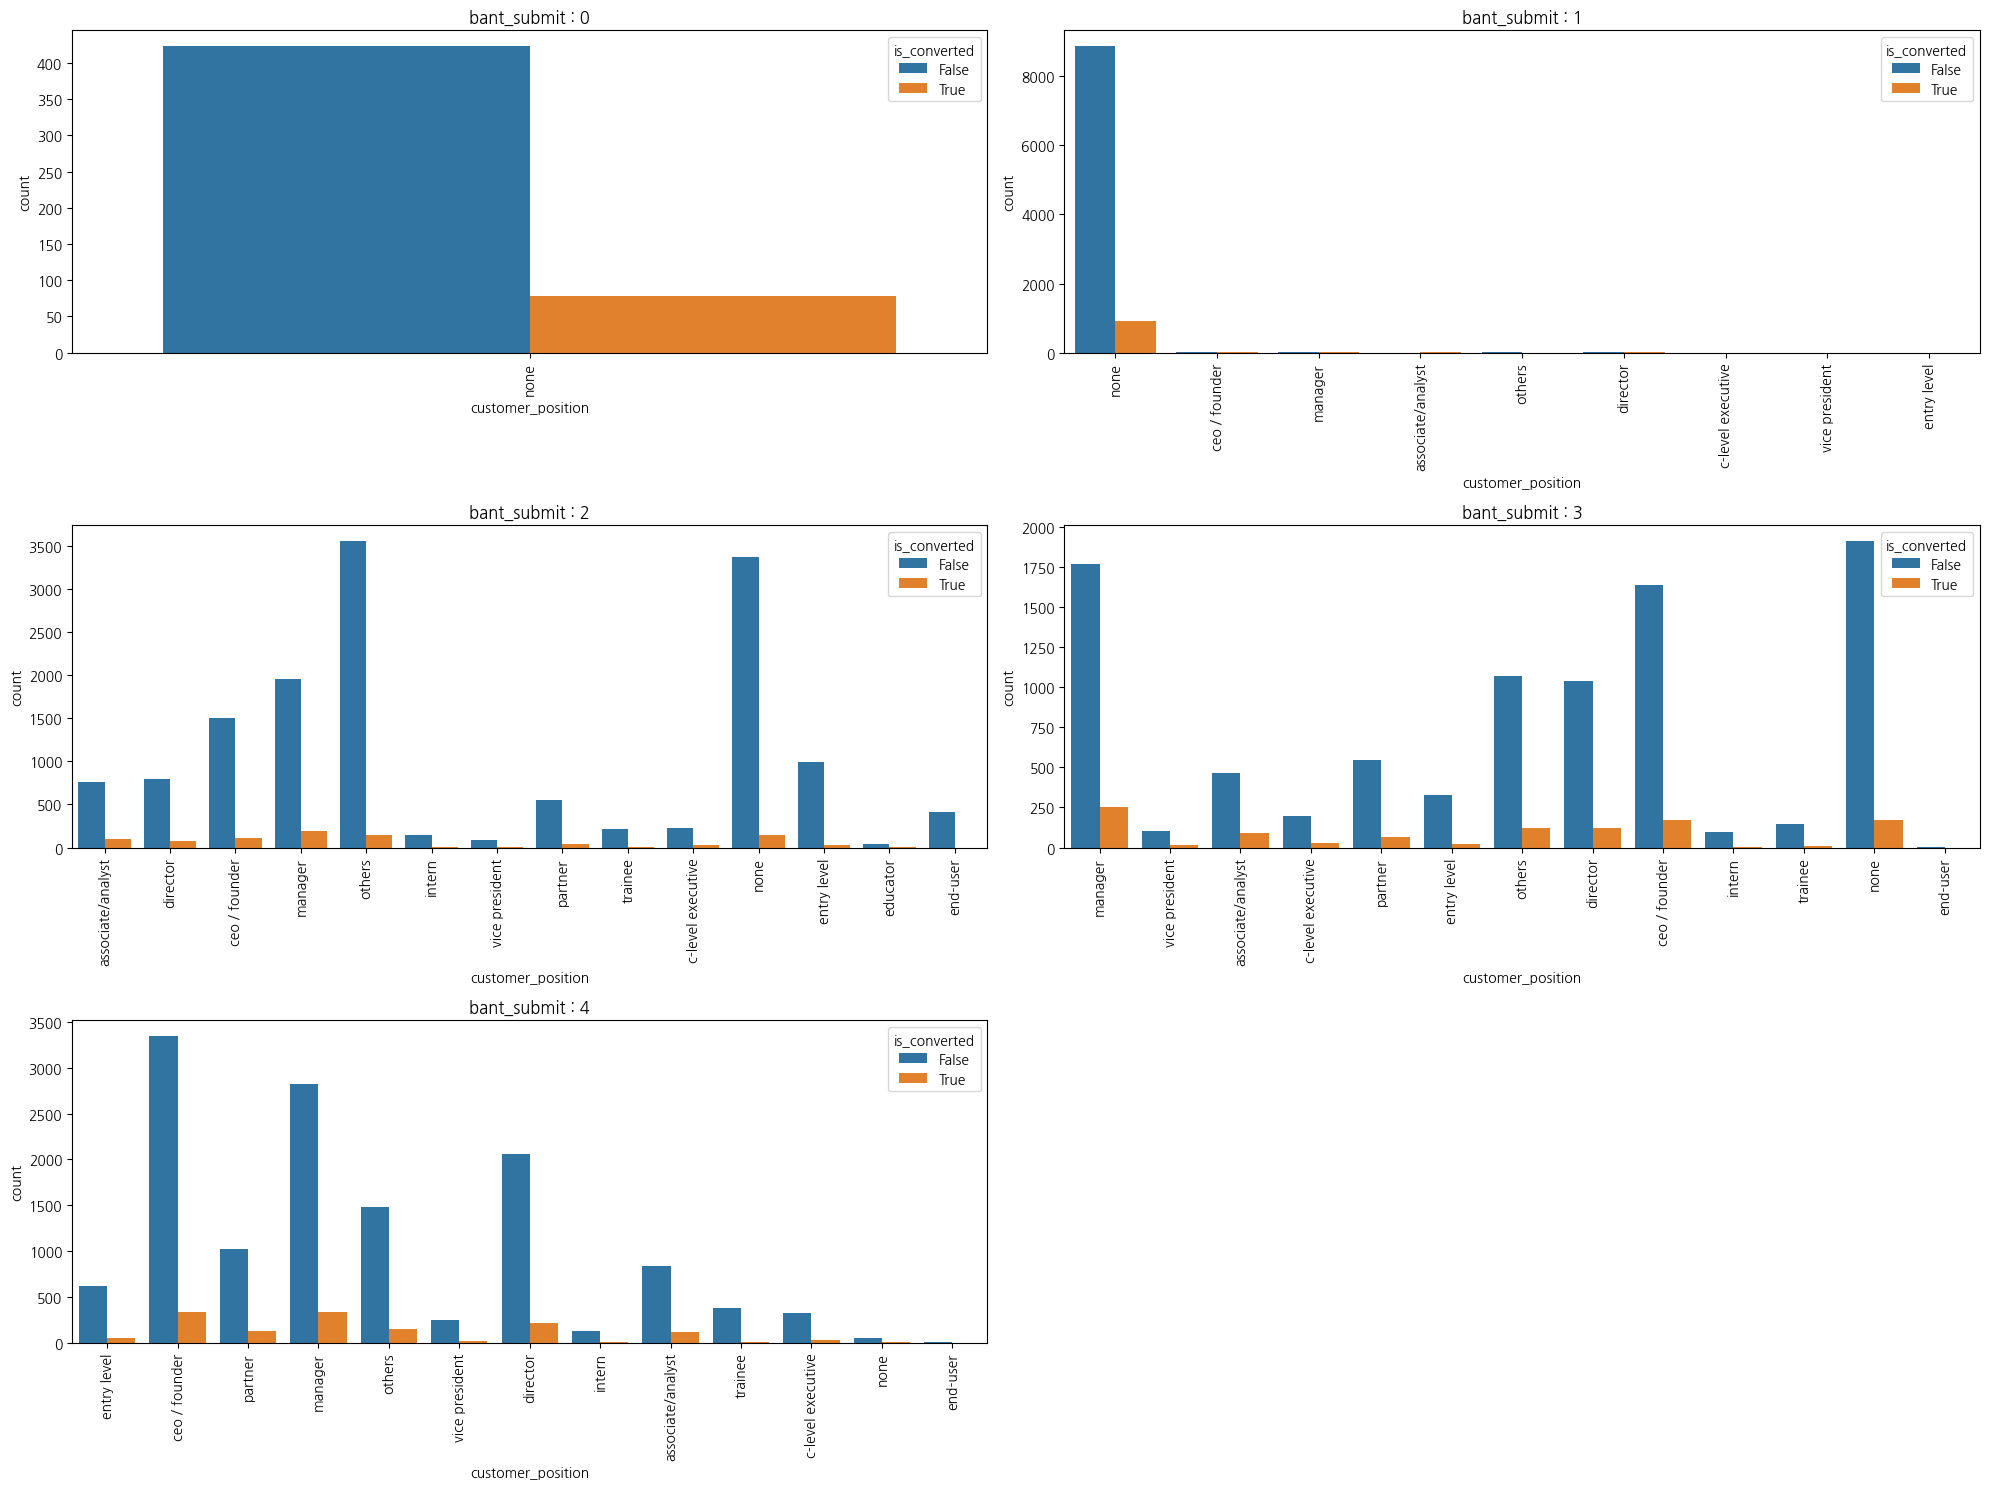

In [36]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="customer_position", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/3676650331.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/3676650331.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/3676650331.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/3676650331.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

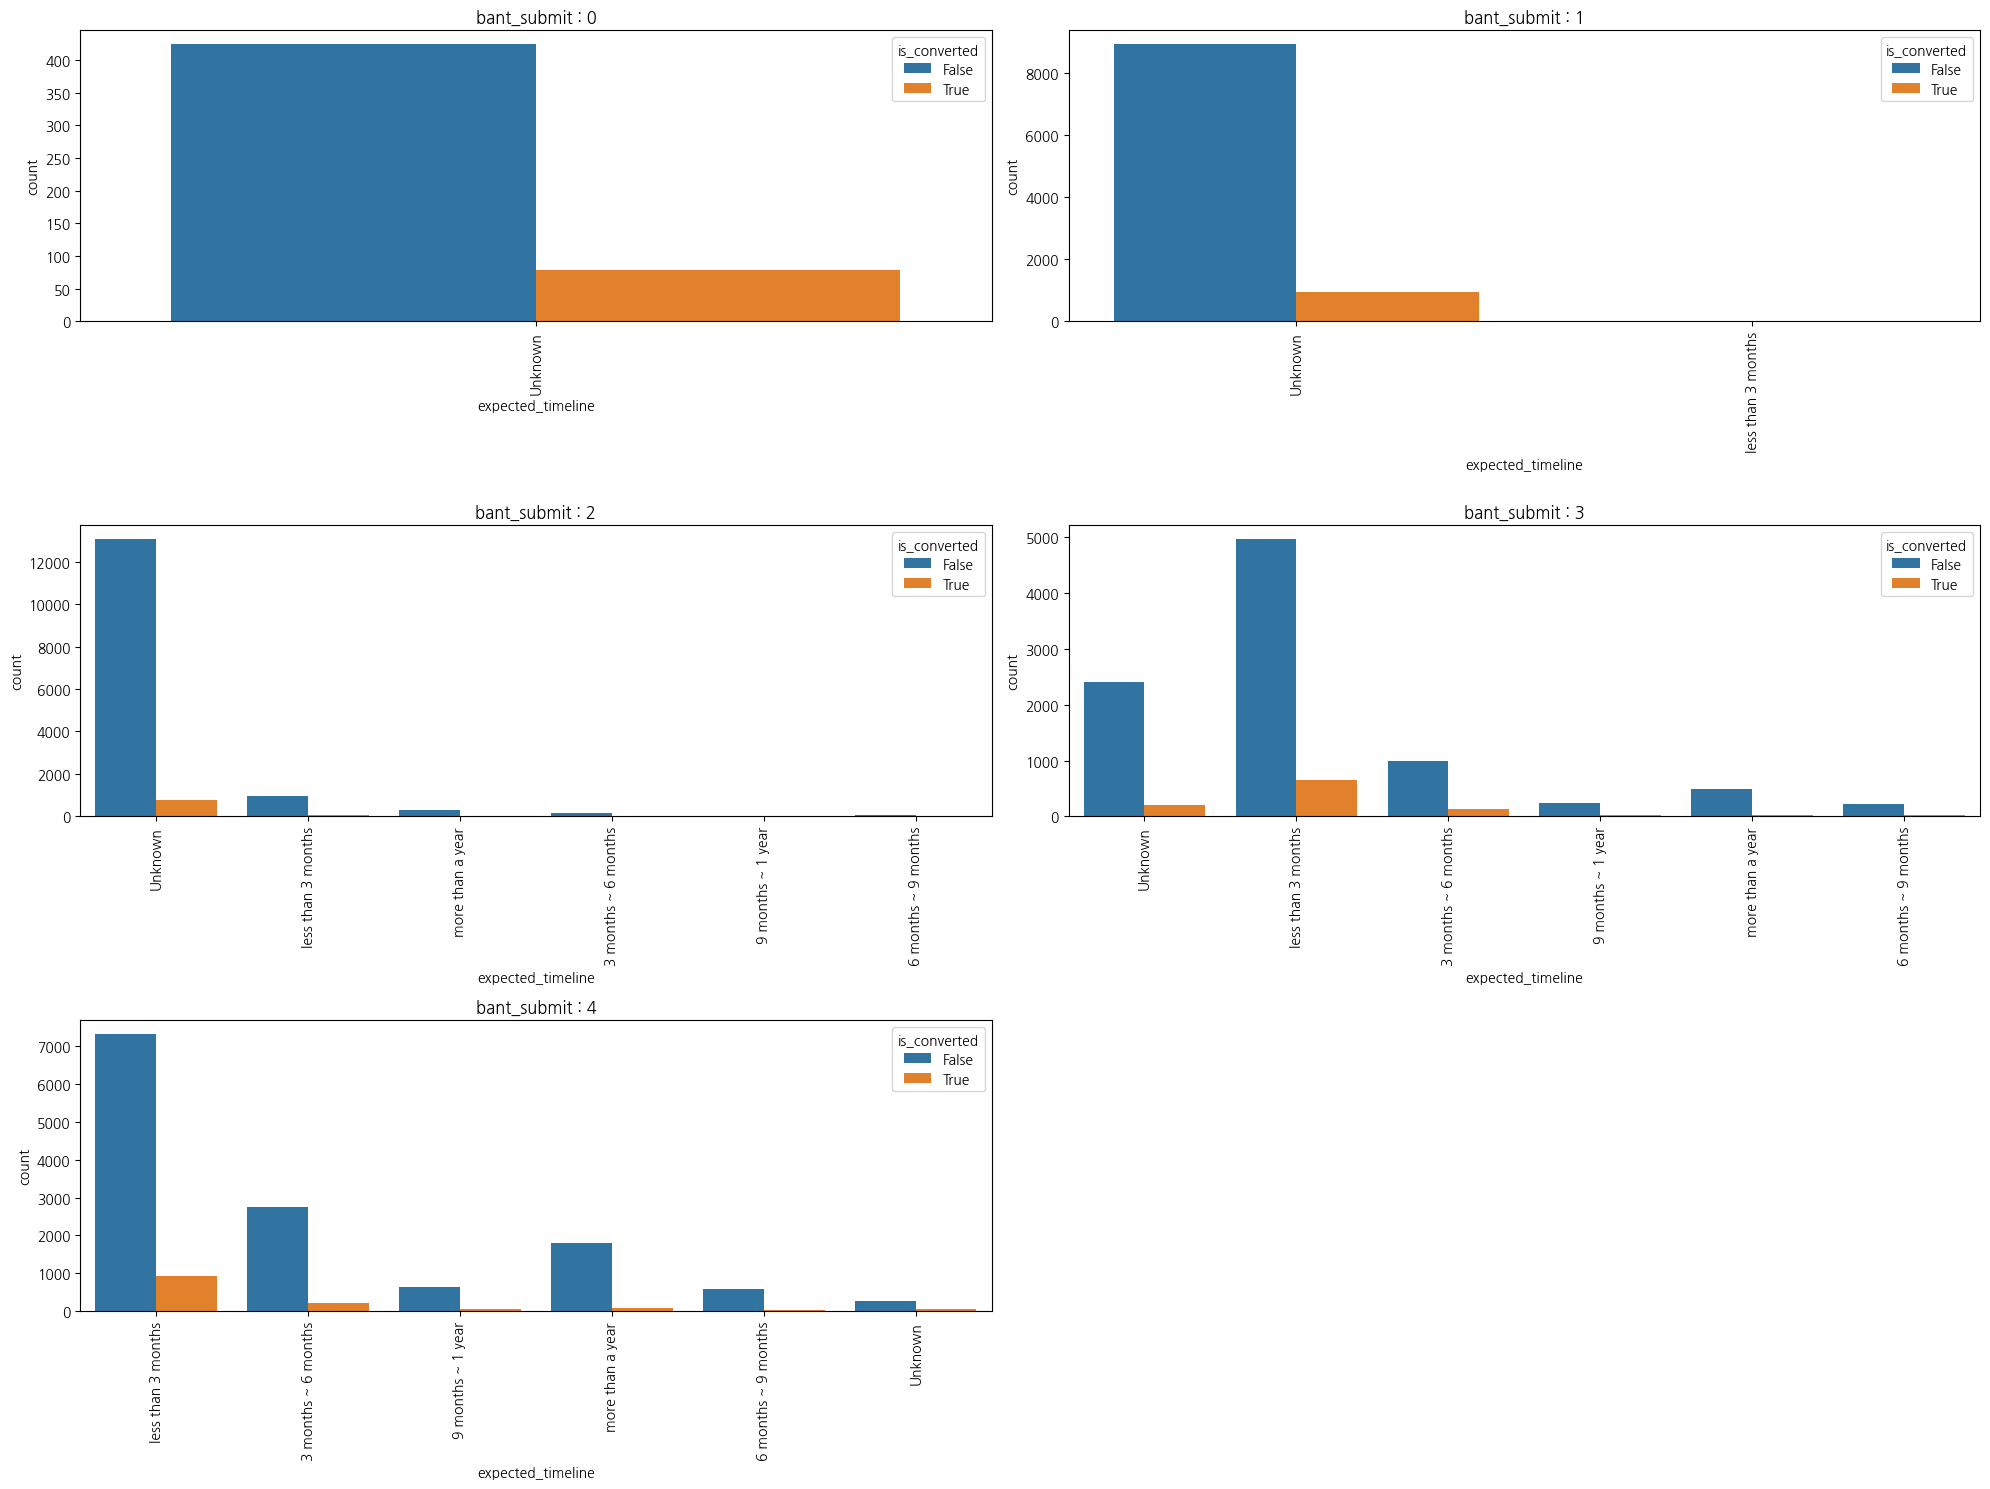

In [37]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="expected_timeline", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2526016823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2526016823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2526016823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
/var/folders/kv/46dvhwp932v4b692v761hjdc0000gn/T/ipykernel_95395/2526016823.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

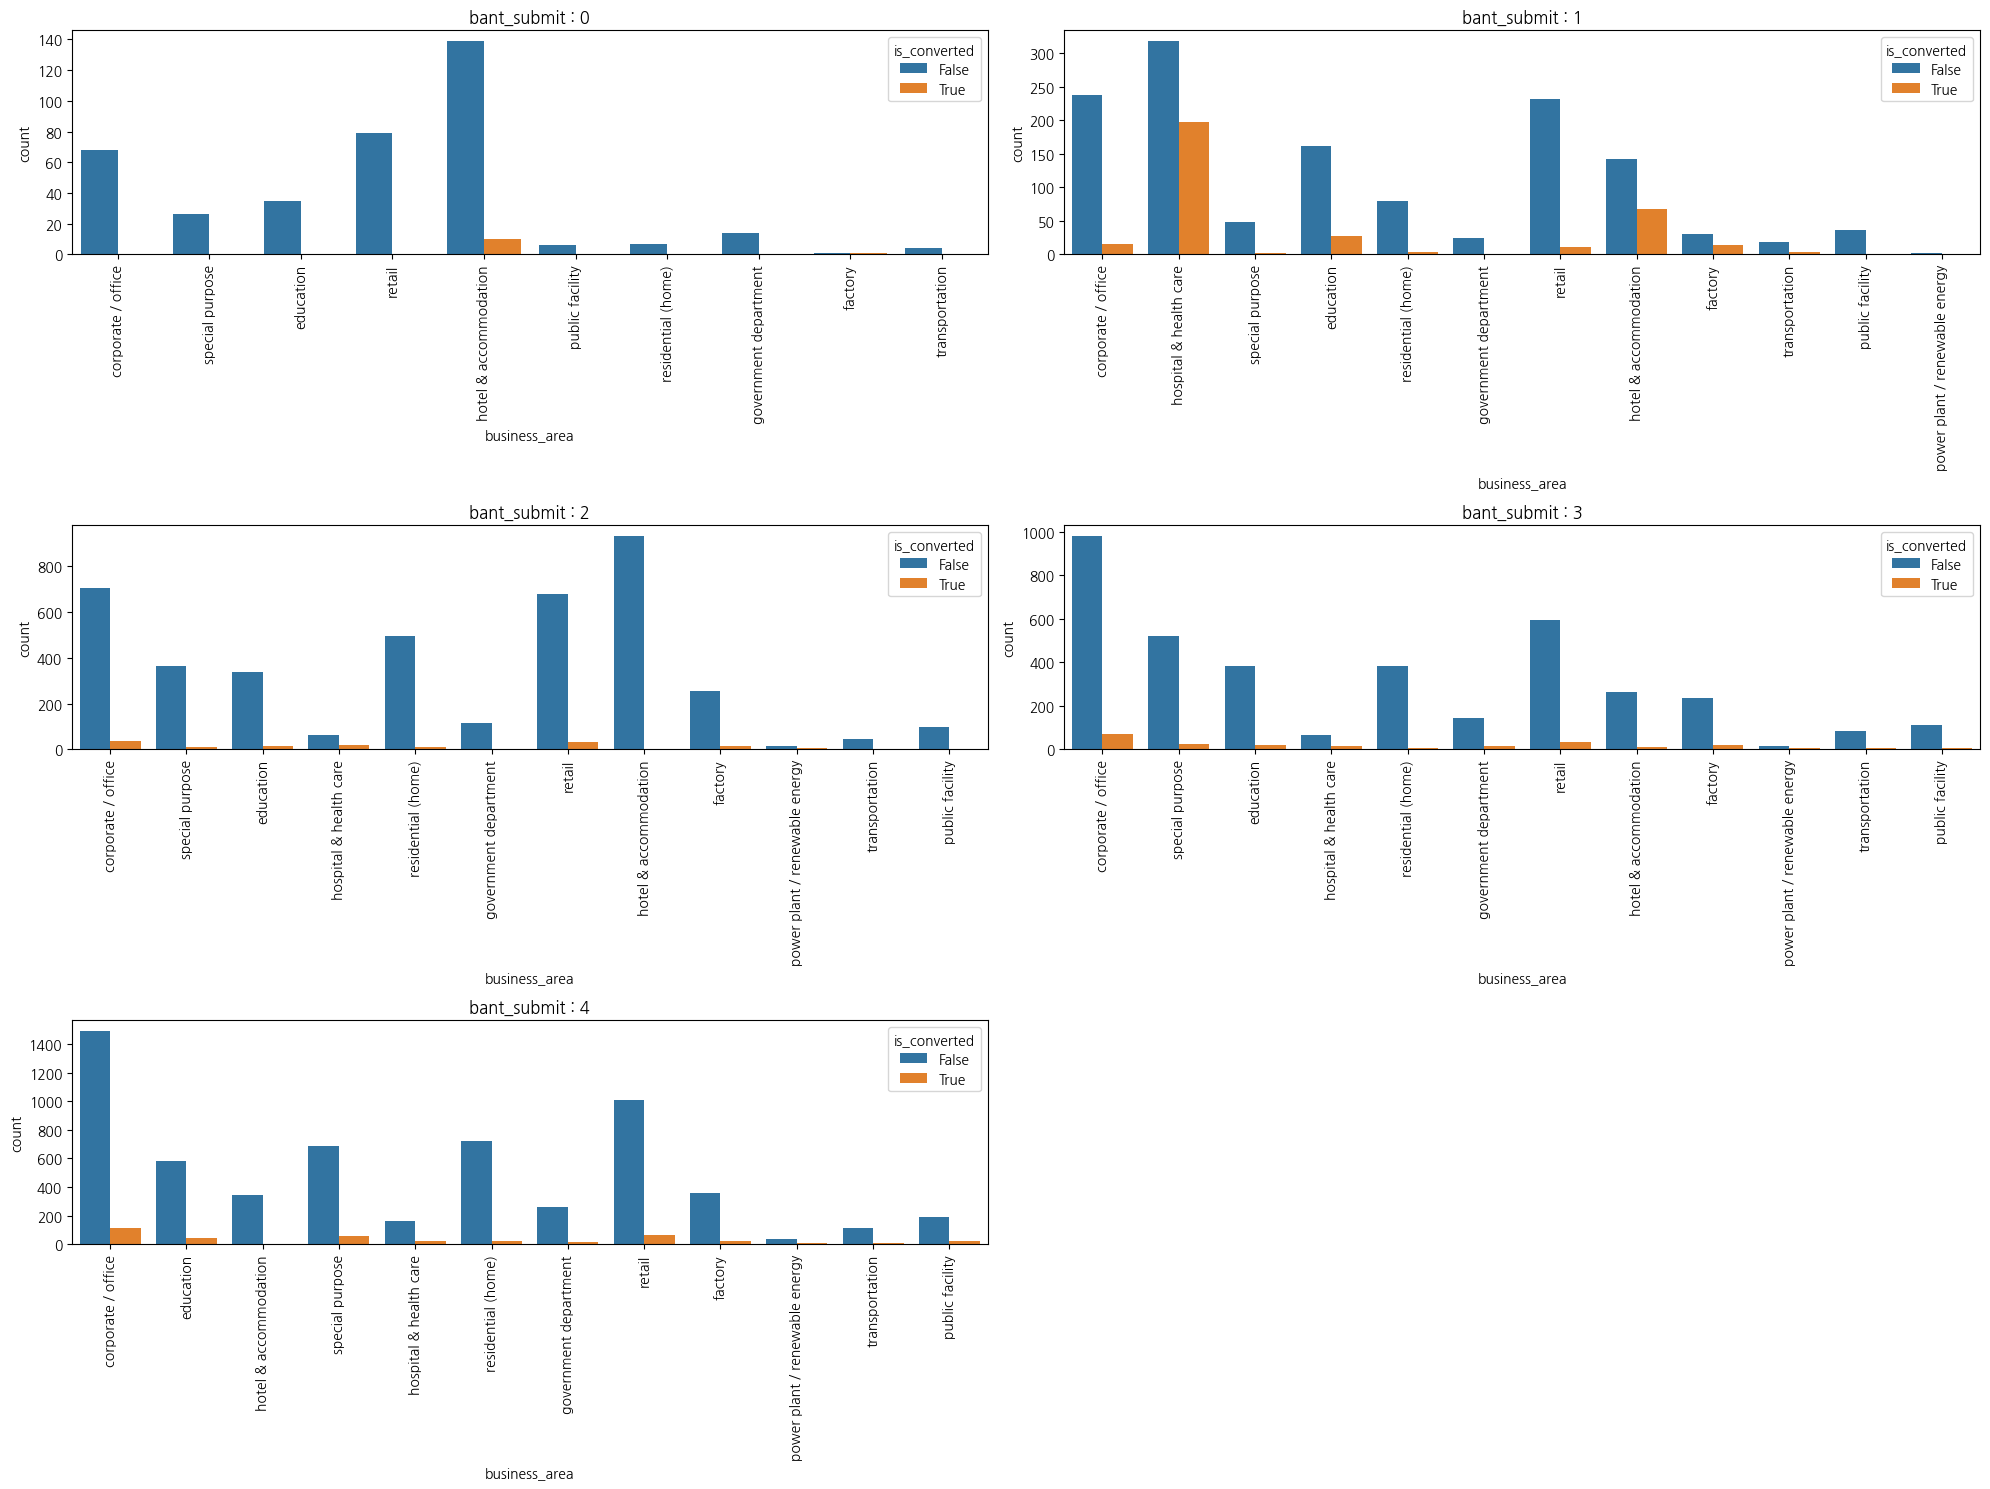

In [38]:
unique_list = train["bant_submit"].sort_values(ascending=True).unique()
num = len(unique_list)
num_cols = 2
num_rows = (num + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
for i, uni in enumerate(unique_list):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(train[train["bant_submit"]==uni], x="business_area", hue="is_converted", ax=ax)
    ax.set_title(f"bant_submit : {uni}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# 마지막 행에 빈 서브플롯이 있을 경우 제거
if num % num_cols != 0:
    for j in range(num % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, j])

fig.tight_layout()

<Axes: xlabel='customer_idx', ylabel='historical_existing_cnt'>

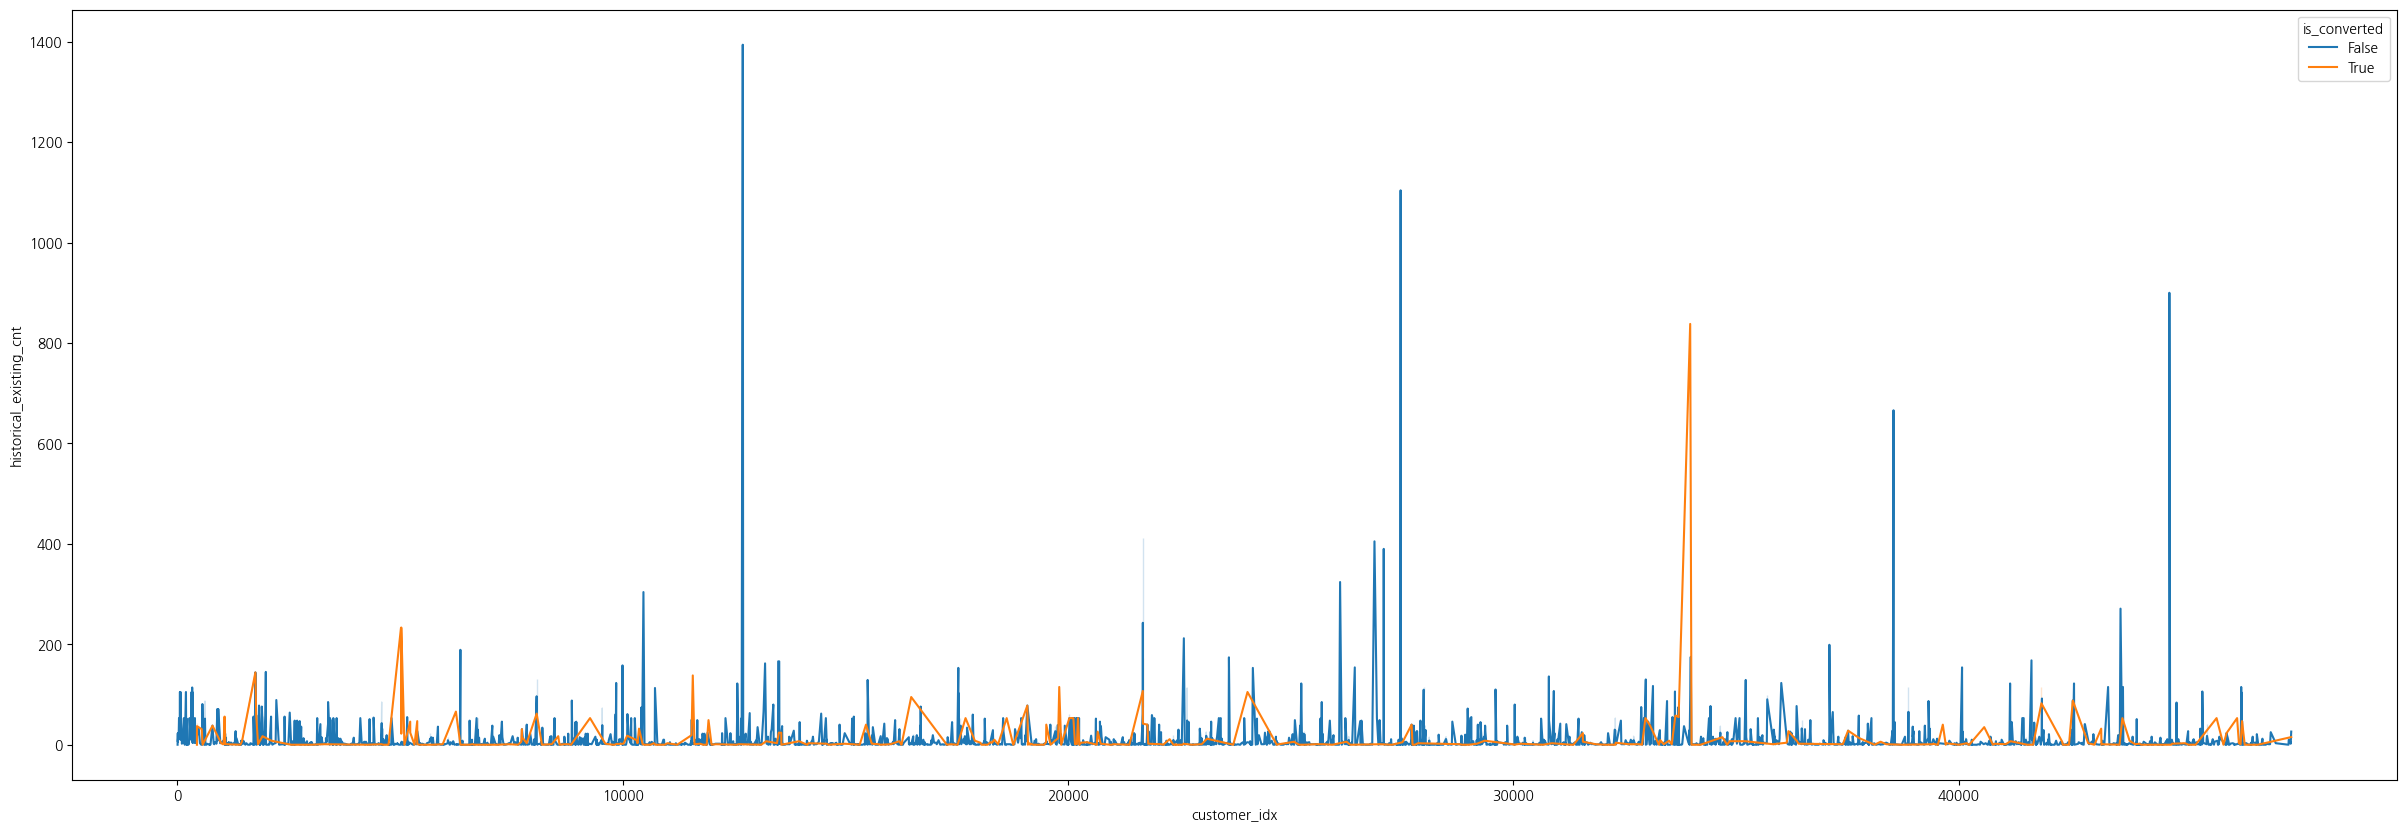

In [39]:
plt.figure(figsize=(30, 10))
sns.lineplot(train, x="customer_idx", y="historical_existing_cnt", hue="is_converted")

<Axes: xlabel='lead_owner', ylabel='historical_existing_cnt'>

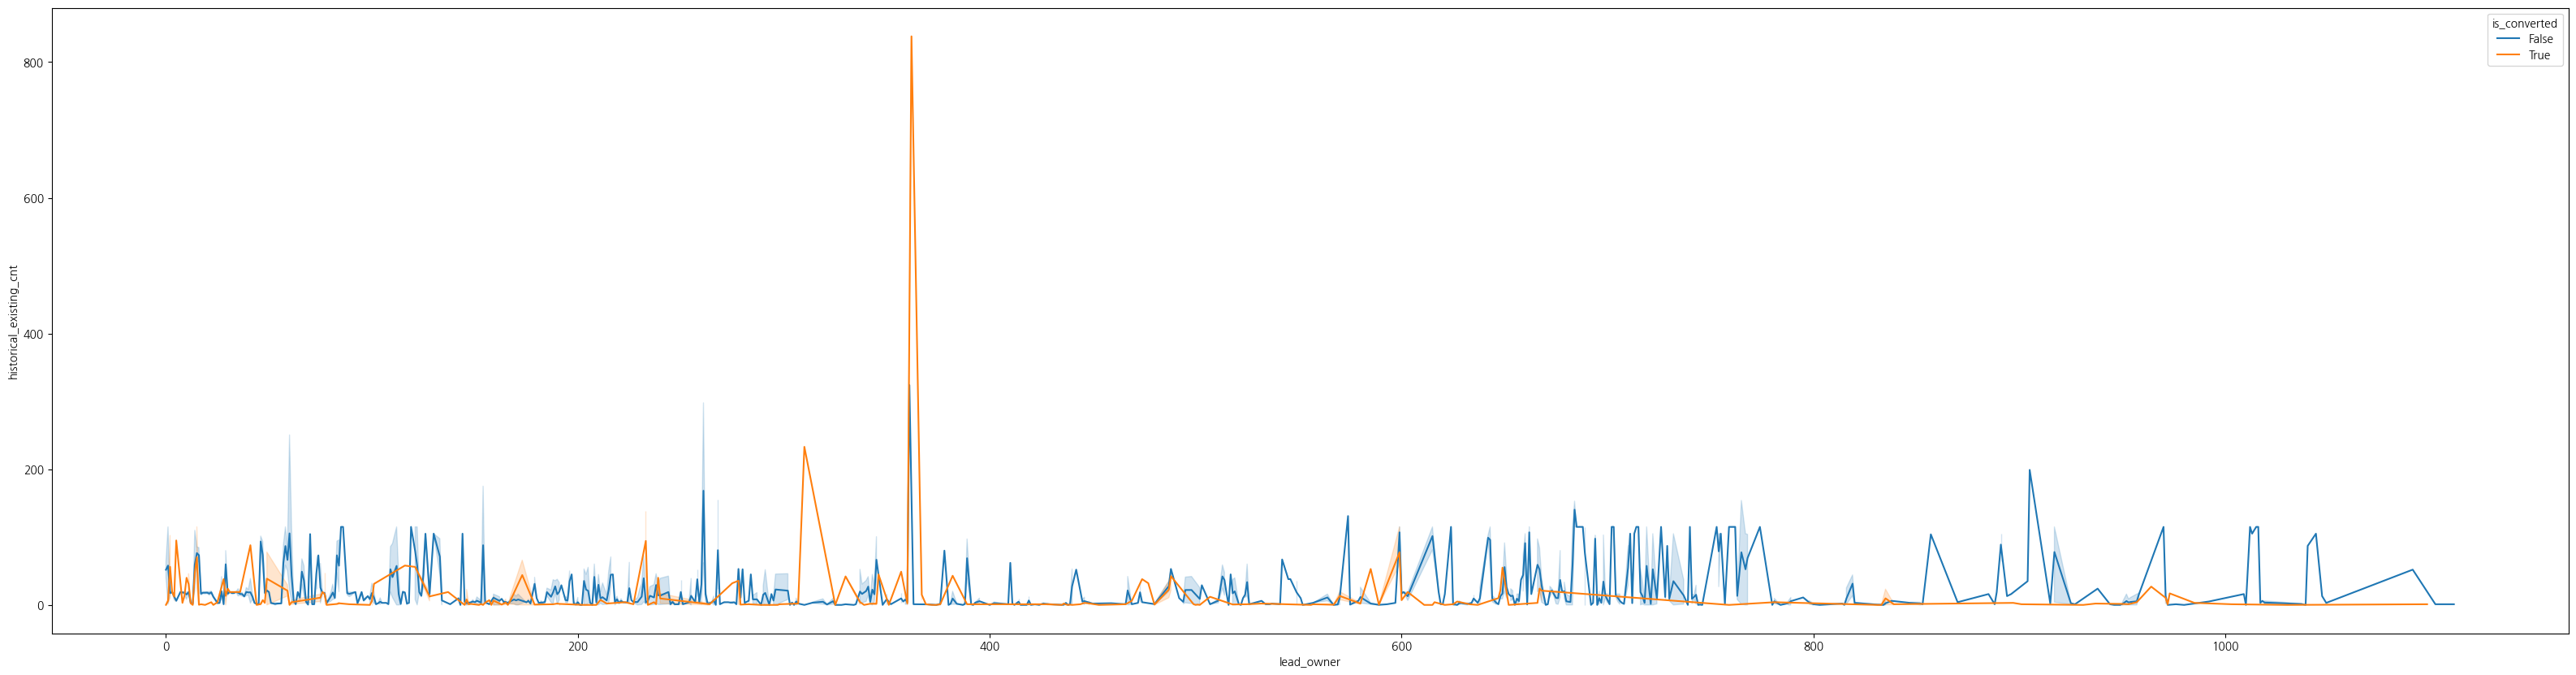

In [40]:
plt.figure(figsize=(40, 10))
sns.lineplot(train, x="lead_owner", y="historical_existing_cnt", hue="is_converted")

In [41]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train, x="lead_owner", y="lead_desc_length", hue="is_converted")

<Axes: xlabel='lead_owner', ylabel='lead_desc_length'>

<Axes: xlabel='lead_owner', ylabel='lead_desc_length'>

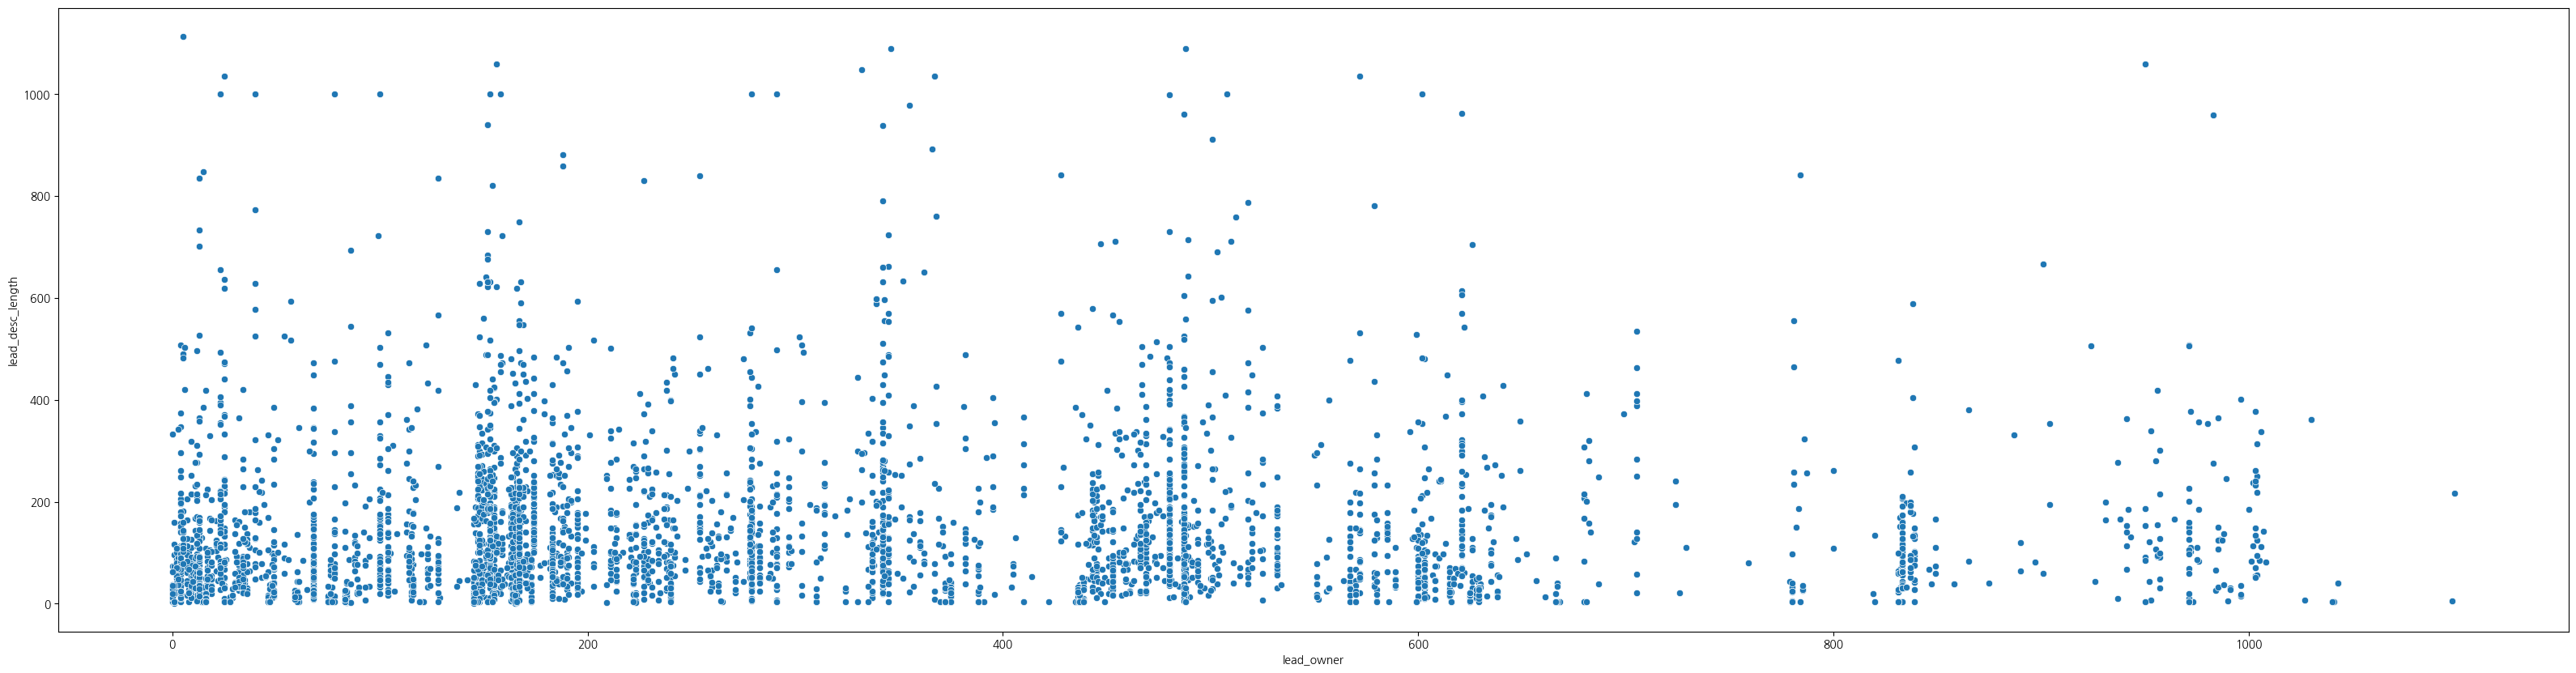

In [42]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train[train["is_converted"]==True], x="lead_owner", y="lead_desc_length")

In [43]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train[train["is_converted"]==False], x="lead_owner", y="lead_desc_length")

<Axes: xlabel='lead_owner', ylabel='lead_desc_length'>

In [44]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train, x="customer_idx", y="lead_desc_length", hue="is_converted")

<Axes: xlabel='customer_idx', ylabel='lead_desc_length'>

<Axes: xlabel='customer_idx', ylabel='lead_desc_length'>

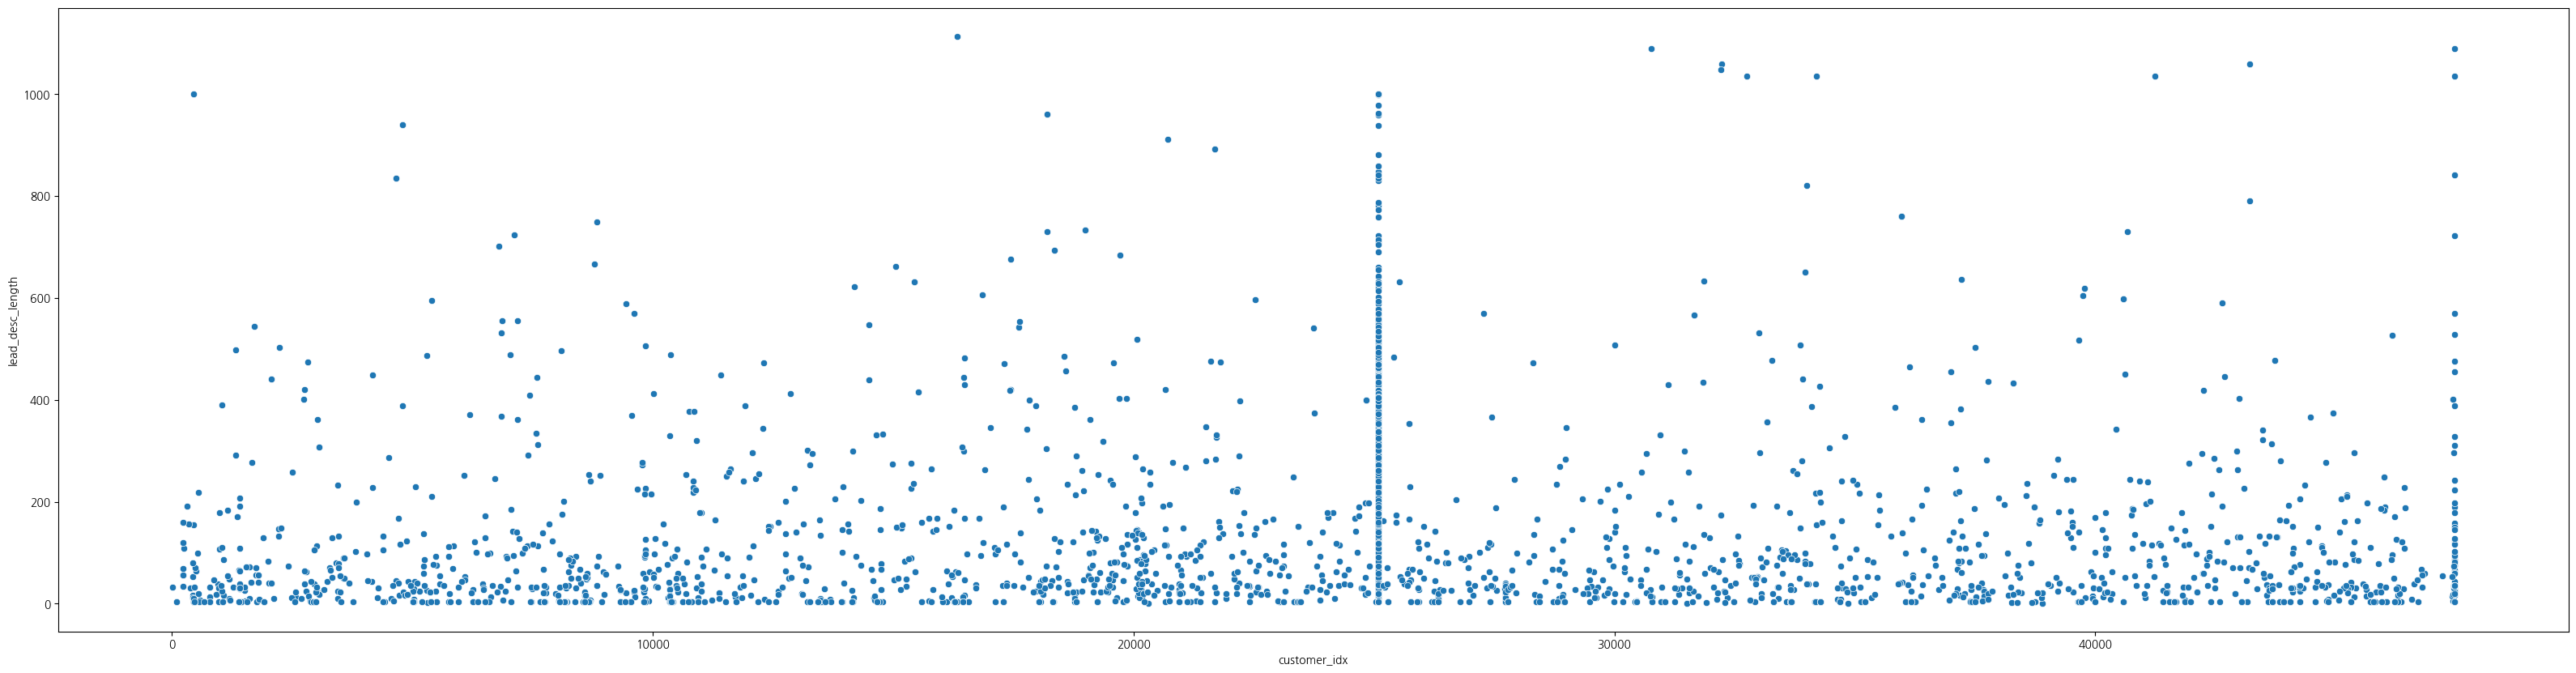

In [45]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train[train["is_converted"]==True], x="customer_idx", y="lead_desc_length")

<Axes: xlabel='customer_idx', ylabel='lead_desc_length'>

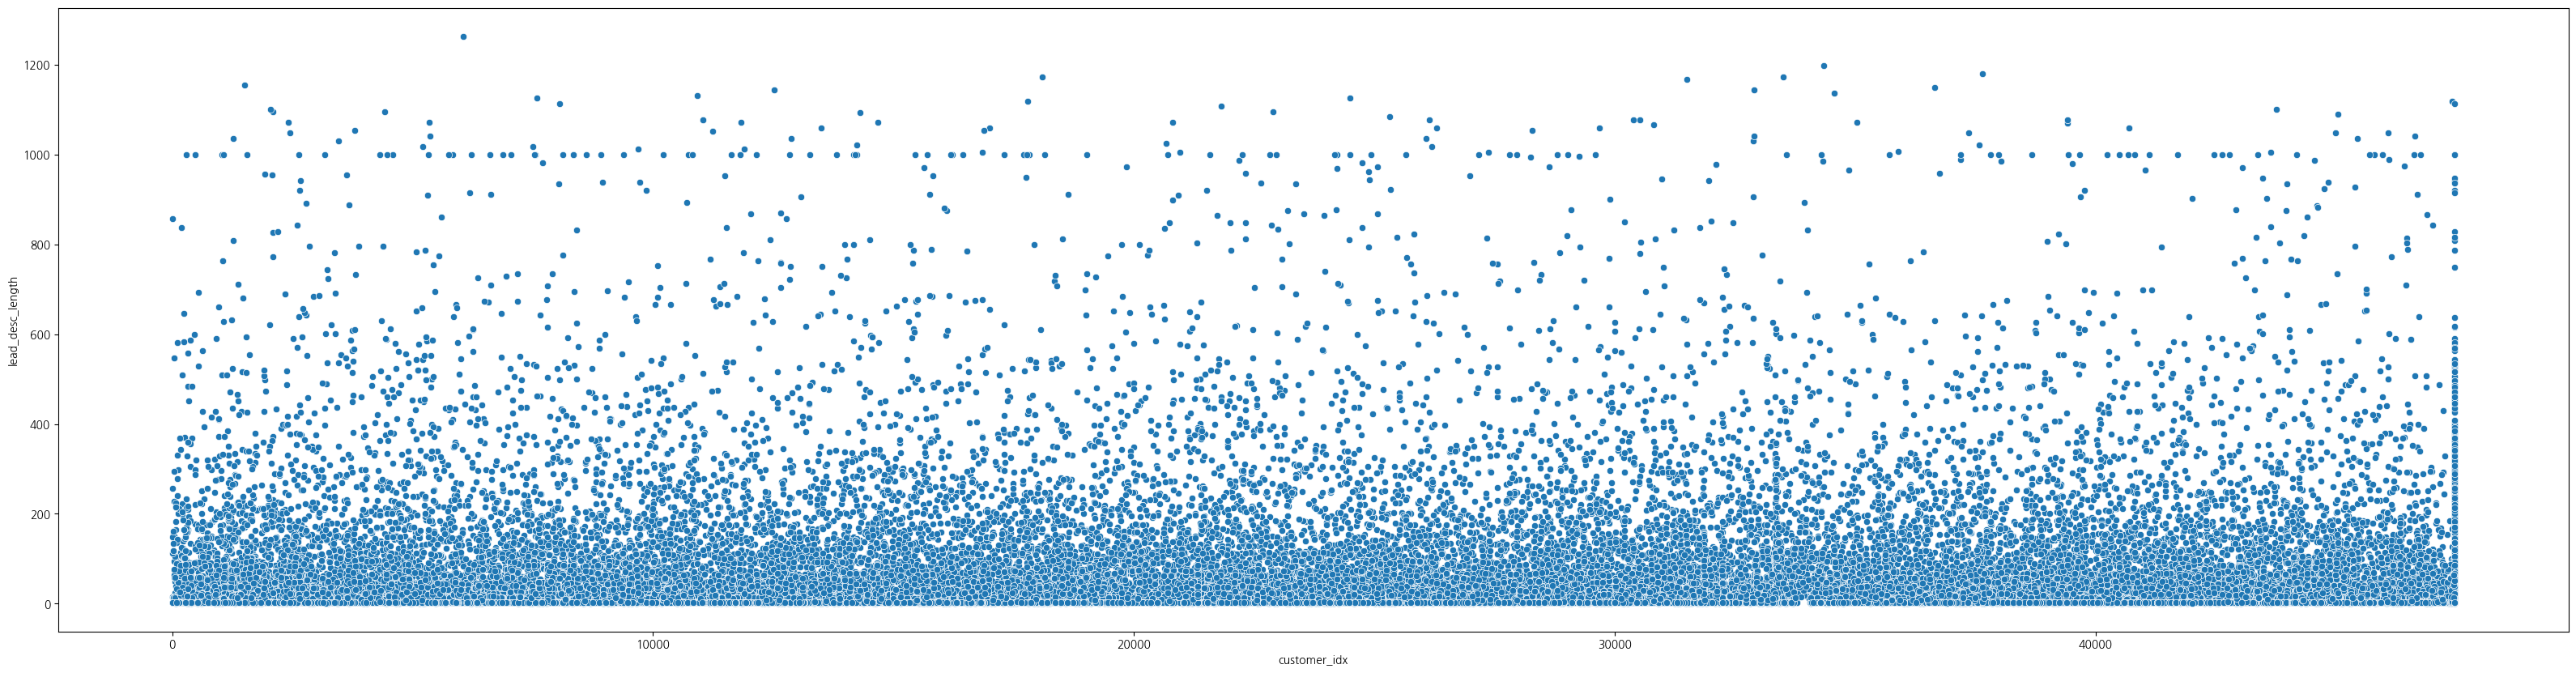

In [46]:
plt.figure(figsize=(40, 10))
sns.scatterplot(train[train["is_converted"]==False], x="customer_idx", y="lead_desc_length")

In [47]:
train[["customer_idx", "is_converted"]].sort_values(by="customer_idx").value_counts()

customer_idx  is_converted
47466         False           5165
25096         True            2396
37680         False            309
21321         False            140
18030         False            119
                              ... 
17316         False              1
17314         False              1
17313         False              1
17310         False              1
23871         False              1
Name: count, Length: 34571, dtype: int64

In [48]:
train[(train["customer_idx"]==25096)]

bant_submit business_unit  customer_idx customer_type  enterprise  \
405              4            ID         25096           NaN           0   
408              4            ID         25096           NaN           1   
429              3            ID         25096           NaN           0   
430              2            ID         25096           NaN           0   
433              2            ID         25096           NaN           0   
...            ...           ...           ...           ...         ...   
47222            1            IT         25096           NaN           1   
47224            1            IT         25096           NaN           1   
47232            1            IT         25096           NaN           1   
47233            1            IT         25096           NaN           1   
52539            3            ID         25096           NaN           1   

       historical_existing_cnt            customer_job  lead_desc_length  \
405                        NaN        entrepreneurship               112   
408                        NaN             real estate               147   
429                        NaN  information technology               106   
430                        NaN                 support               264   
433                        NaN  information technology                85   
...                        ...                     ...               ...   
47222                      NaN              consulting                60   
47224                      NaN    surgery professional                74   
47232                      NaN  radiology professional                35   
47233                      NaN                   other                19   
52539                      NaN               education                37   

                             inquiry_type product_category  customer_position  \
405    quotation or purchase consultation          SIGNAGE      ceo / founder   
408    quotation or purchase consultation          SIGNAGE      ceo / founder   
429       usage or technical consultation          SIGNAGE            manager   
430    quotation or purchase consultation         SOLUTION             others   
433    quotation or purchase consultation          SIGNAGE               none   
...                                   ...              ...                ...   
47222  quotation or purchase consultation    NOT-AVAILABLE               none   
47224  quotation or purchase consultation    NOT-AVAILABLE               none   
47232  quotation or purchase consultation    NOT-AVAILABLE               none   
47233  quotation or purchase consultation          DISPLAY               none   
52539  quotation or purchase consultation          SIGNAGE  c-level executive   

      response_corporate    expected_timeline       business_area  \
405                LGESJ   less than 3 months  corporate / office   
408                LGESJ   less than 3 months  corporate / office   
429                LGESJ   less than 3 months  corporate / office   
430                LGESJ              Unknown  corporate / office   
433                LGESJ   less than 3 months  corporate / office   
...                  ...                  ...                 ...   
47222              LGEPS              Unknown                 NaN   
47224              LGEPS              Unknown                 NaN   
47232              LGESJ              Unknown                 NaN   
47233              LGEFS              Unknown                 NaN   
52539              LGETH  3 months ~ 6 months           education   

      business_subarea  lead_owner  is_converted customer_country3  
405                NaN         153          True      Saudi Arabia  
408                NaN         153          True      Saudi Arabia  
429                NaN         153          True      Saudi Arabia  
430                NaN         153          True      Saudi Arabia  
433                NaN         153

In [49]:
train[(train["customer_idx"]==47466) & (train["is_converted"]==True)]["inquiry_type"].value_counts()

inquiry_type
quotation or purchase consultation    54
others                                 1
Request for Partnership                1
Name: count, dtype: int64

In [50]:
train[(train["customer_idx"]==47466) & (train["is_converted"]==False)]["inquiry_type"].value_counts()

inquiry_type
quotation or purchase consultation    4262
sales inquiry                          825
others                                  28
usage or technical consultation         26
Request for Partnership                 10
product information                      4
Customer Suggestions                     1
Request for Distributorship              1
Request a Demo                           1
Name: count, dtype: int64

<Axes: xlabel='lead_owner', ylabel='historical_existing_cnt'>

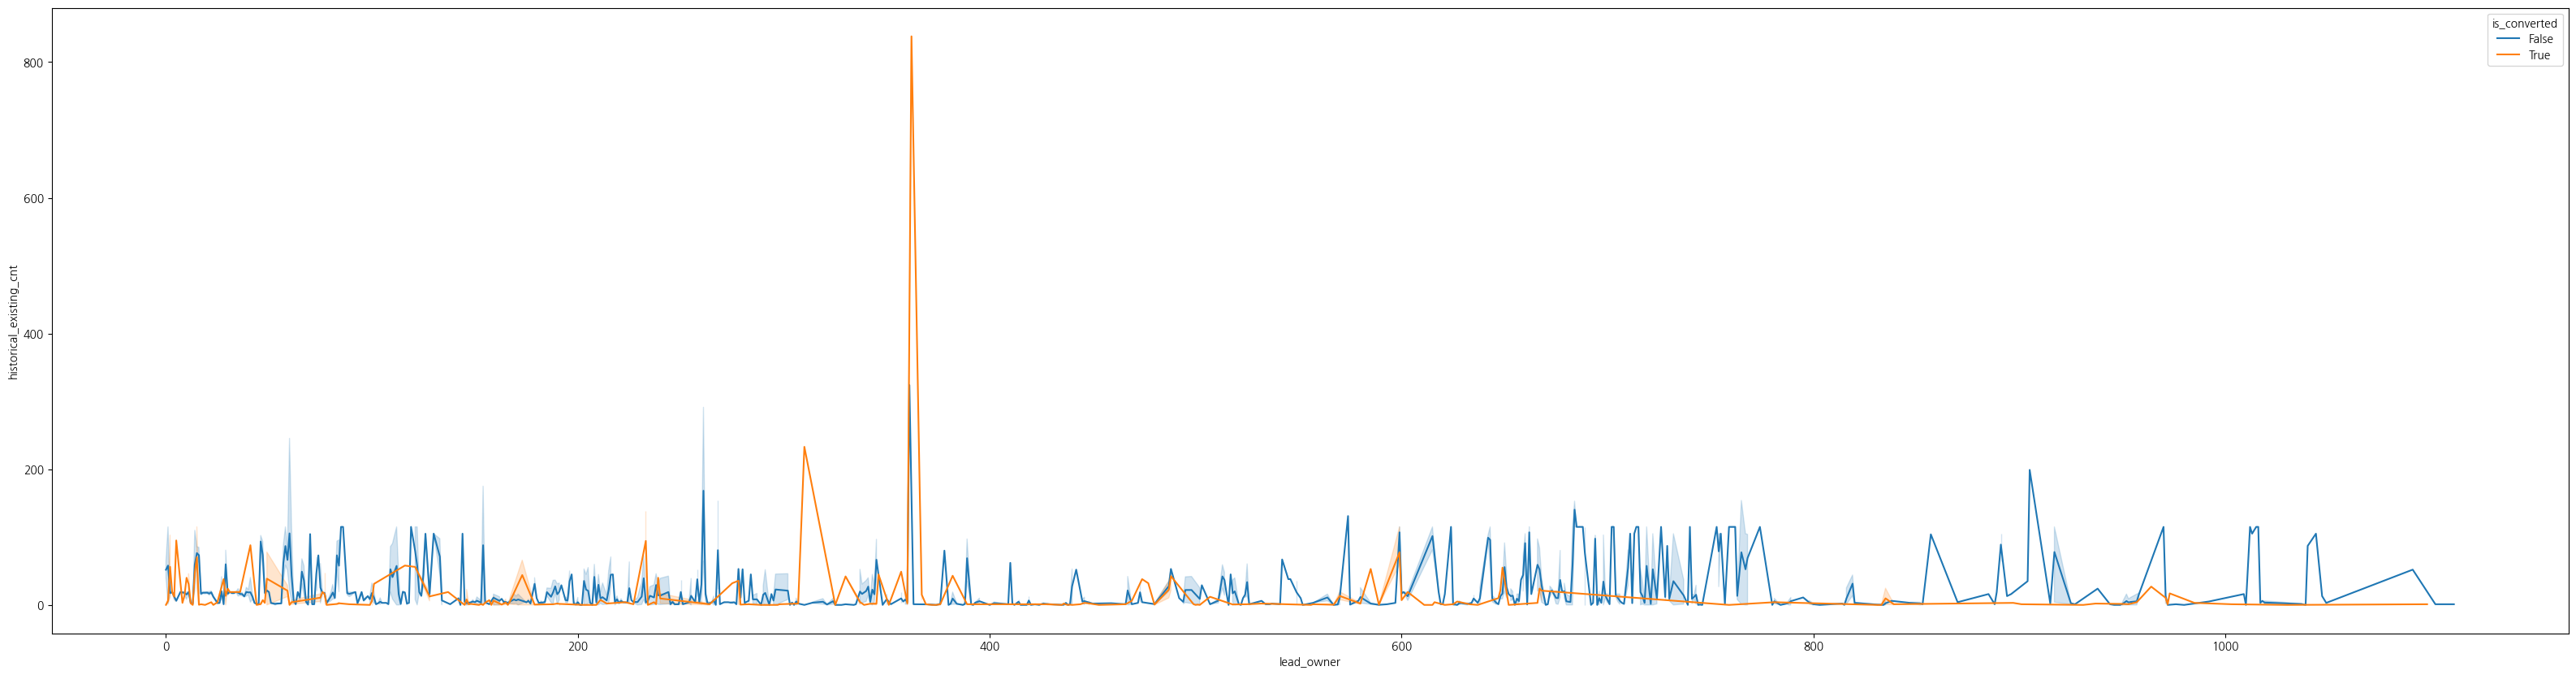

In [51]:
plt.figure(figsize=(40, 10))
sns.lineplot(train, x="lead_owner", y="historical_existing_cnt", hue="is_converted")

<Axes: xlabel='business_area', ylabel='count'>

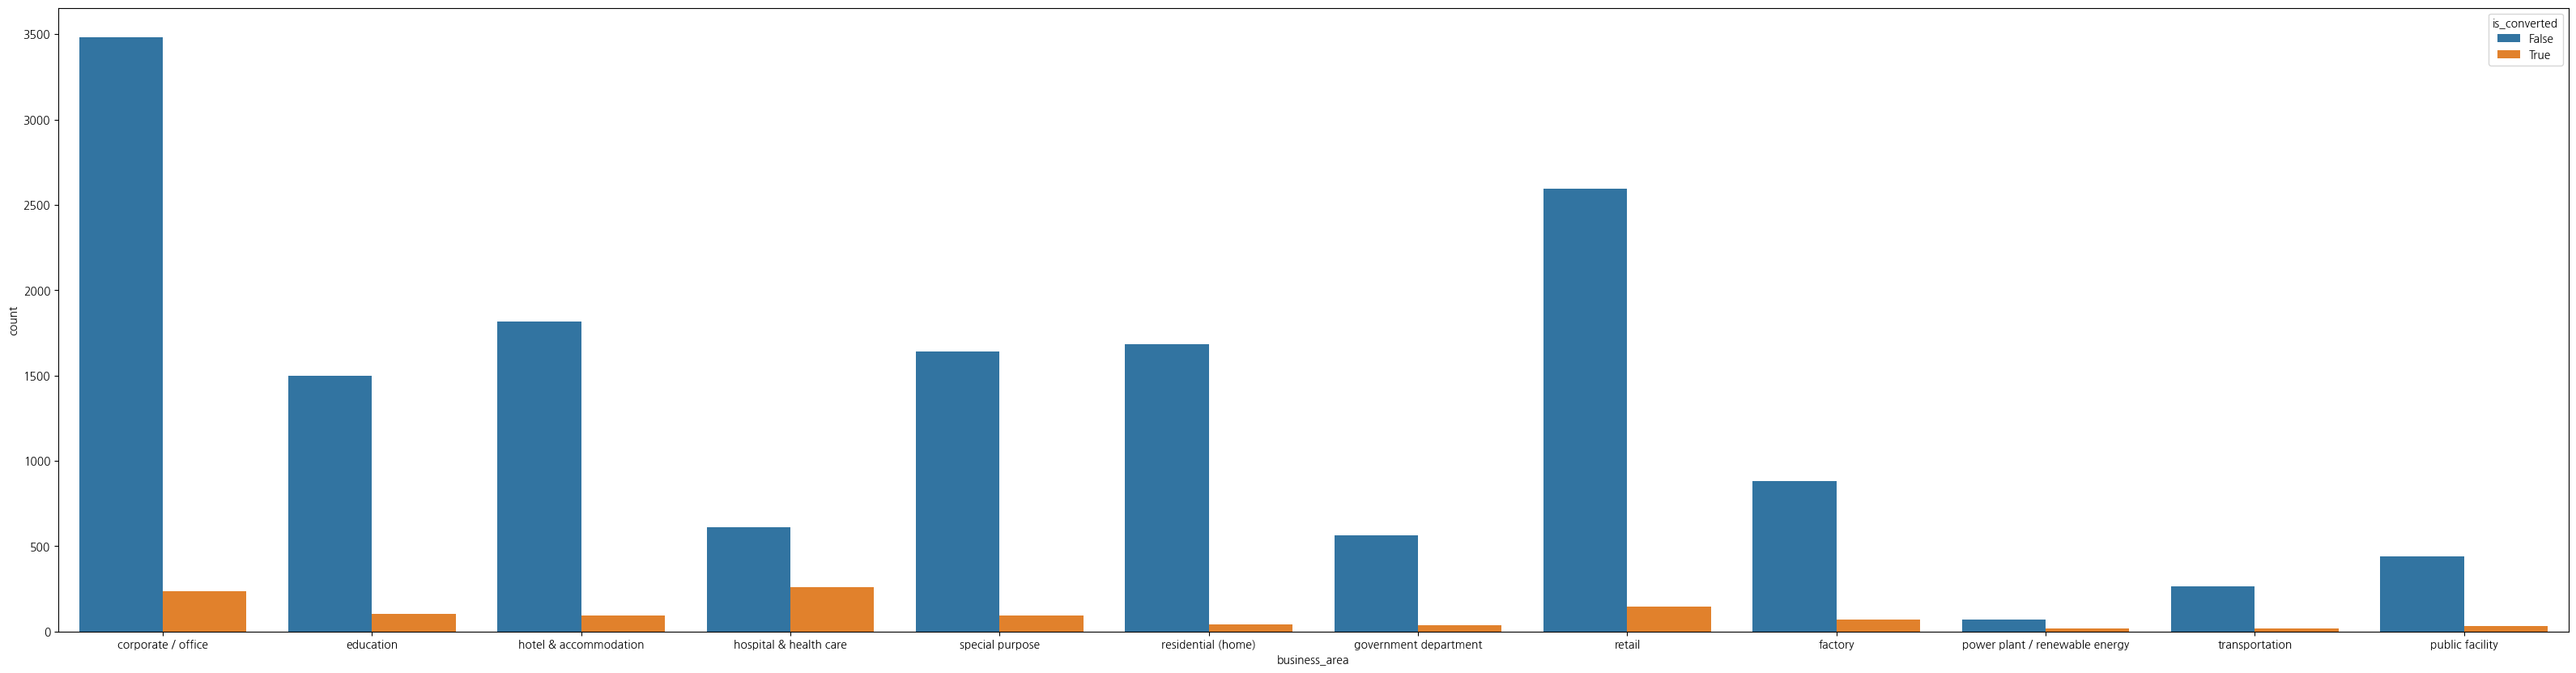

In [52]:
plt.figure(figsize=(40, 10))
sns.countplot(train, x="business_area", hue="is_converted")

In [53]:
train.groupby("business_area").sum()["is_converted"]

business_area
corporate / office                235
education                         104
factory                            71
government department              38
hospital & health care            259
hotel & accommodation              94
power plant / renewable energy     17
public facility                    30
residential (home)                 43
retail                            144
special purpose                    94
transportation                     16
Name: is_converted, dtype: int64

In [54]:
train["business_area"].value_counts()

business_area
corporate / office                3715
retail                            2738
hotel & accommodation             1911
special purpose                   1736
residential (home)                1727
education                         1600
factory                            952
hospital & health care             869
government department              601
public facility                    472
transportation                     279
power plant / renewable energy      88
Name: count, dtype: int64

In [276]:
train[train["is_converted"]==True]["business_area"].value_counts()/(len(train)-train["business_area"].isna().sum())*100

business_area
hospital & health care            1.552013
corporate / office                1.408198
retail                            0.862895
education                         0.623202
hotel & accommodation             0.563279
special purpose                   0.563279
factory                           0.425455
residential (home)                0.257670
government department             0.227709
public facility                   0.179770
power plant / renewable energy    0.101870
transportation                    0.095877
Name: count, dtype: float64

In [277]:
train[train["is_converted"]==False]["business_area"].value_counts()/(len(train)-train["business_area"].isna().sum())*100

business_area
corporate / office                20.853308
retail                            15.544104
hotel & accommodation             10.888063
residential (home)                10.091083
special purpose                    9.839406
education                          8.964525
factory                            5.279243
hospital & health care             3.655321
government department              3.373682
public facility                    2.648610
transportation                     1.575983
power plant / renewable energy     0.425455
Name: count, dtype: float64

In [278]:
train[train["is_converted"]==True]["business_area"].value_counts()/train["business_area"].value_counts()*100

business_area
corporate / office                 6.325707
education                          6.500000
factory                            7.457983
government department              6.322795
hospital & health care            29.804373
hotel & accommodation              4.918891
power plant / renewable energy    19.318182
public facility                    6.355932
residential (home)                 2.489867
retail                             5.259313
special purpose                    5.414747
transportation                     5.734767
Name: count, dtype: float64

In [279]:
train[(train["business_area"]=="hospital & health care") & (train["is_converted"]==True)]["business_unit"].value_counts()

business_unit
IT    228
ID     17
AS     14
Name: count, dtype: int64

In [280]:
train[(train["business_area"]=="power plant / renewable energy") & (train["is_converted"]==True)]["business_unit"].value_counts()

business_unit
ID    9
AS    8
Name: count, dtype: int64

In [281]:
train["business_area"].isna().sum()

34300

In [282]:
trn_len_75_under = train[train["lead_desc_length"]<=75]

In [284]:
trn_len_75_upper = train[train["lead_desc_length"]>75]

In [283]:
wrangiling(trn_len_75_under)

       Shape      


(35471, 18)

        Info      
<class 'pandas.core.frame.DataFrame'>
Index: 35471 entries, 0 to 58297
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              35471 non-null  int64  
 1   business_unit            35471 non-null  object 
 2   customer_idx             35471 non-null  int64  
 3   customer_type            6909 non-null   object 
 4   enterprise               35471 non-null  int64  
 5   historical_existing_cnt  7380 non-null   float64
 6   customer_job             23997 non-null  object 
 7   lead_desc_length         35471 non-null  int64  
 8   inquiry_type             34920 non-null  object 
 9   product_category         35471 non-null  object 
 10  customer_position        35471 non-null  object 
 11  response_corporate       35471 non-null  object 
 12  expected_timeline        35471 non-null  object 
 13  business_area            8878 non-null   object 
 14  business

None

      Columns     


Index(['bant_submit', 'business_unit', 'customer_idx', 'customer_type',
       'enterprise', 'historical_existing_cnt', 'customer_job',
       'lead_desc_length', 'inquiry_type', 'product_category',
       'customer_position', 'response_corporate', 'expected_timeline',
       'business_area', 'business_subarea', 'lead_owner', 'is_converted',
       'customer_country3'],
      dtype='object')

        NaN       


bant_submit                    0
business_unit                  0
customer_idx                   0
customer_type              28562
enterprise                     0
historical_existing_cnt    28091
customer_job               11474
lead_desc_length               0
inquiry_type                 551
product_category               0
customer_position              0
response_corporate             0
expected_timeline              0
business_area              26593
business_subarea           33357
lead_owner                     0
is_converted                   0
customer_country3              0
dtype: int64

     Duplicated   


Empty DataFrame
Columns: [bant_submit, business_unit, customer_idx, customer_type, enterprise, historical_existing_cnt, customer_job, lead_desc_length, inquiry_type, product_category, customer_position, response_corporate, expected_timeline, business_area, business_subarea, lead_owner, is_converted, customer_country3]
Index: []

    Description   


bant_submit  customer_idx    enterprise  historical_existing_cnt  \
count  35471.000000  35471.000000  35471.000000              7380.000000   
mean       2.488794  26575.110062      0.705590                17.705014   
std        1.113660  14548.452286      0.455783                43.592100   
min        0.000000      2.000000      0.000000                 0.000000   
25%        2.000000  14215.000000      0.000000                 1.000000   
50%        2.000000  26711.000000      1.000000                 4.000000   
75%        4.000000  39188.500000      1.000000                19.000000   
max        4.000000  47466.000000      1.000000              1104.000000   

       lead_desc_length    lead_owner  
count      35471.000000  35471.000000  
mean          22.036791    253.654337  
std           20.254701    230.095582  
min            1.000000      0.000000  
25%            3.000000     97.000000  
50%           14.000000    175.000000  
75%           35.000000    363.000000  
max           75.000000   1109.000000

      Unique      


bant_submit                    5
business_unit                  4
customer_idx               23906
customer_type                  6
enterprise                     2
historical_existing_cnt      126
customer_job                  36
lead_desc_length              75
inquiry_type                  16
product_category              18
customer_position             14
response_corporate            51
expected_timeline              6
business_area                 12
business_subarea              78
lead_owner                   795
is_converted                   2
customer_country3            147
dtype: int64

In [285]:
wrangiling(trn_len_75_upper)

       Shape      


(15517, 18)

        Info      
<class 'pandas.core.frame.DataFrame'>
Index: 15517 entries, 1 to 58299
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              15517 non-null  int64  
 1   business_unit            15517 non-null  object 
 2   customer_idx             15517 non-null  int64  
 3   customer_type            5398 non-null   object 
 4   enterprise               15517 non-null  int64  
 5   historical_existing_cnt  2883 non-null   float64
 6   customer_job             12080 non-null  object 
 7   lead_desc_length         15517 non-null  int64  
 8   inquiry_type             15201 non-null  object 
 9   product_category         15517 non-null  object 
 10  customer_position        15517 non-null  object 
 11  response_corporate       15517 non-null  object 
 12  expected_timeline        15517 non-null  object 
 13  business_area            7810 non-null   object 
 14  business

None

      Columns     


Index(['bant_submit', 'business_unit', 'customer_idx', 'customer_type',
       'enterprise', 'historical_existing_cnt', 'customer_job',
       'lead_desc_length', 'inquiry_type', 'product_category',
       'customer_position', 'response_corporate', 'expected_timeline',
       'business_area', 'business_subarea', 'lead_owner', 'is_converted',
       'customer_country3'],
      dtype='object')

        NaN       


bant_submit                    0
business_unit                  0
customer_idx                   0
customer_type              10119
enterprise                     0
historical_existing_cnt    12634
customer_job                3437
lead_desc_length               0
inquiry_type                 316
product_category               0
customer_position              0
response_corporate             0
expected_timeline              0
business_area               7707
business_subarea           13104
lead_owner                     0
is_converted                   0
customer_country3              0
dtype: int64

     Duplicated   


Empty DataFrame
Columns: [bant_submit, business_unit, customer_idx, customer_type, enterprise, historical_existing_cnt, customer_job, lead_desc_length, inquiry_type, product_category, customer_position, response_corporate, expected_timeline, business_area, business_subarea, lead_owner, is_converted, customer_country3]
Index: []

    Description   


bant_submit  customer_idx    enterprise  historical_existing_cnt  \
count  15517.000000  15517.000000  15517.000000              2883.000000   
mean       2.744538  26275.064897      0.489205                24.416233   
std        1.136511  14022.304712      0.499900                51.544872   
min        0.000000      3.000000      0.000000                 0.000000   
25%        2.000000  15332.000000      0.000000                 1.000000   
50%        3.000000  25096.000000      0.000000                11.000000   
75%        4.000000  38511.000000      1.000000                19.000000   
max        4.000000  47466.000000      1.000000              1394.000000   

       lead_desc_length    lead_owner  
count      15517.000000  15517.000000  
mean         219.507895    272.619579  
std          177.364326    233.605086  
min           76.000000      0.000000  
25%          107.000000     97.000000  
50%          157.000000    194.000000  
75%          259.000000    384.000000  
max         1264.000000   1114.000000

      Unique      


bant_submit                    5
business_unit                  4
customer_idx               11128
customer_type                  6
enterprise                     2
historical_existing_cnt       70
customer_job                  36
lead_desc_length             830
inquiry_type                  13
product_category              17
customer_position             13
response_corporate            51
expected_timeline              6
business_area                 12
business_subarea              83
lead_owner                   868
is_converted                   2
customer_country3            146
dtype: int64

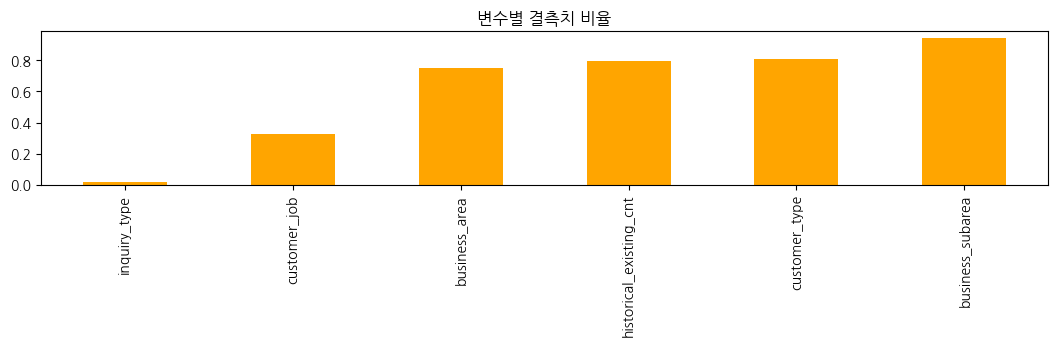

In [290]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = trn_len_75_under.isnull().sum() / trn_len_75_under.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

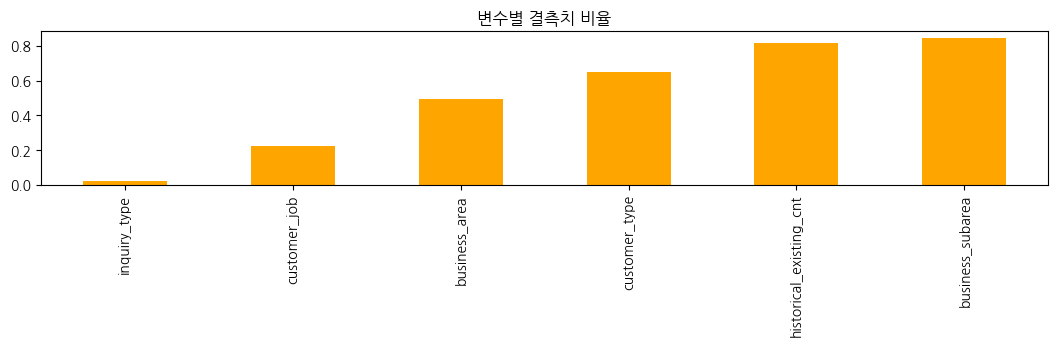

In [291]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = trn_len_75_upper.isnull().sum() / trn_len_75_upper.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

<Axes: xlabel='business_area', ylabel='count'>

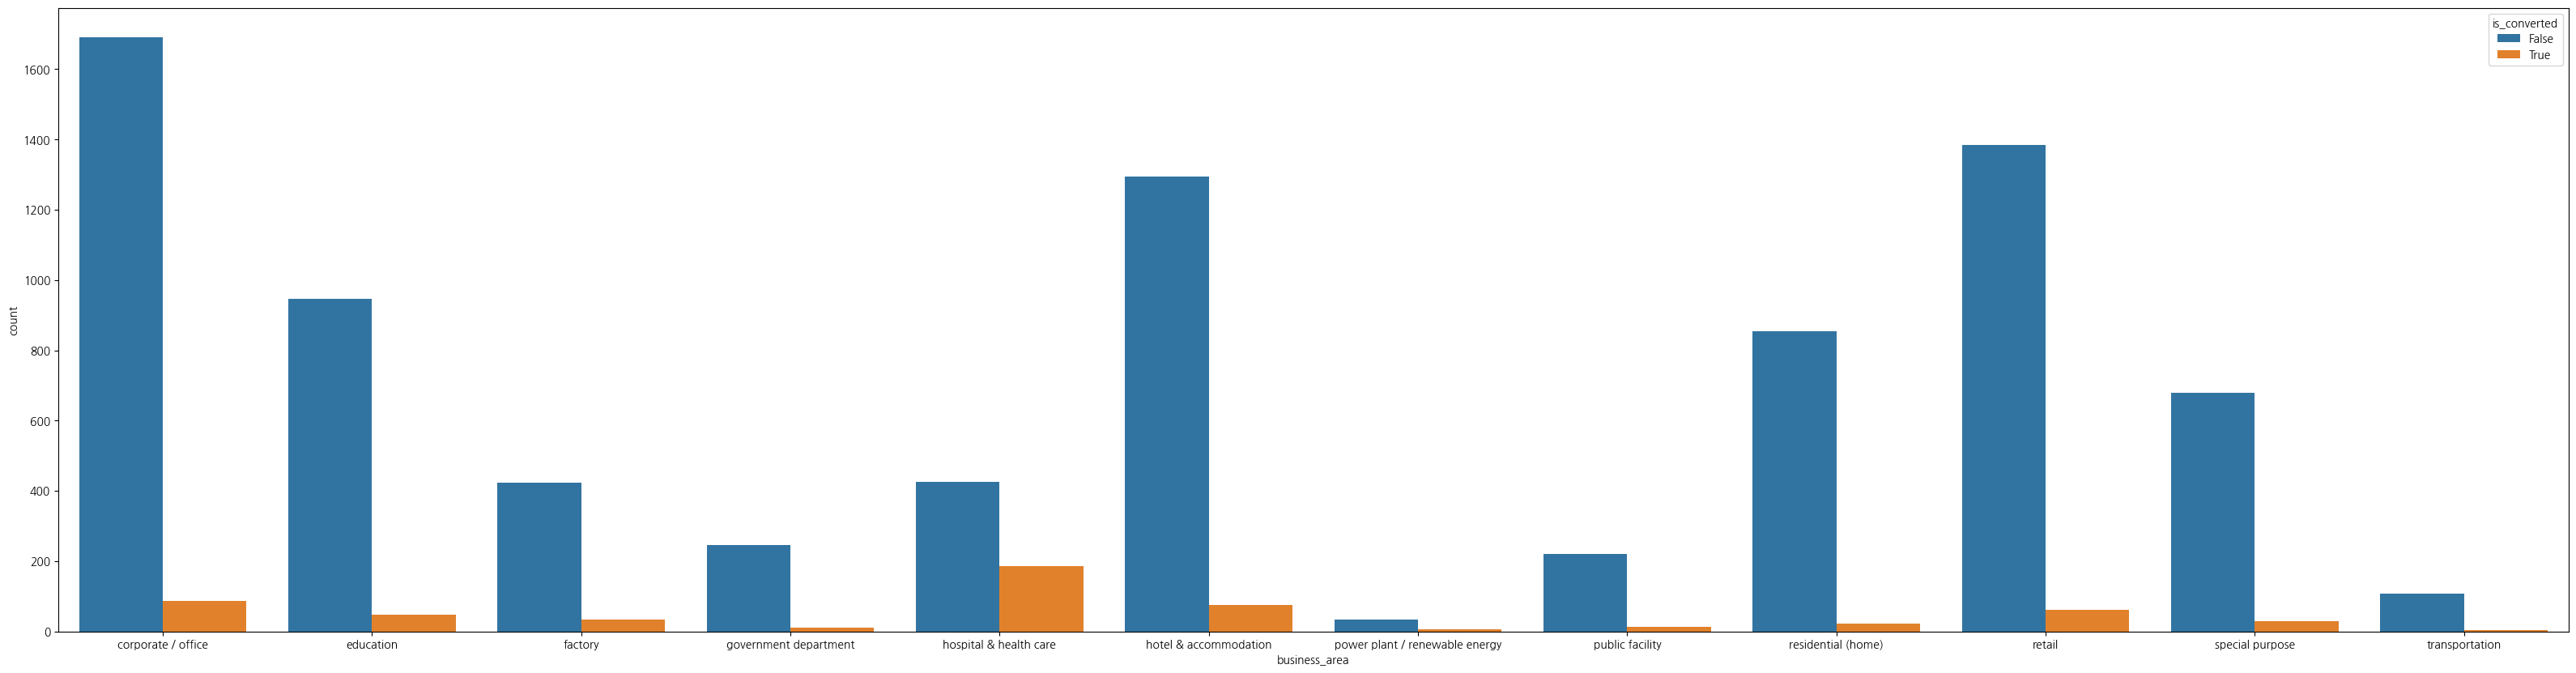

In [298]:
plt.figure(figsize=(40, 10))
sns.countplot(trn_len_75_under.sort_values(by="business_area"), x="business_area", hue="is_converted")

<Axes: xlabel='business_area', ylabel='count'>

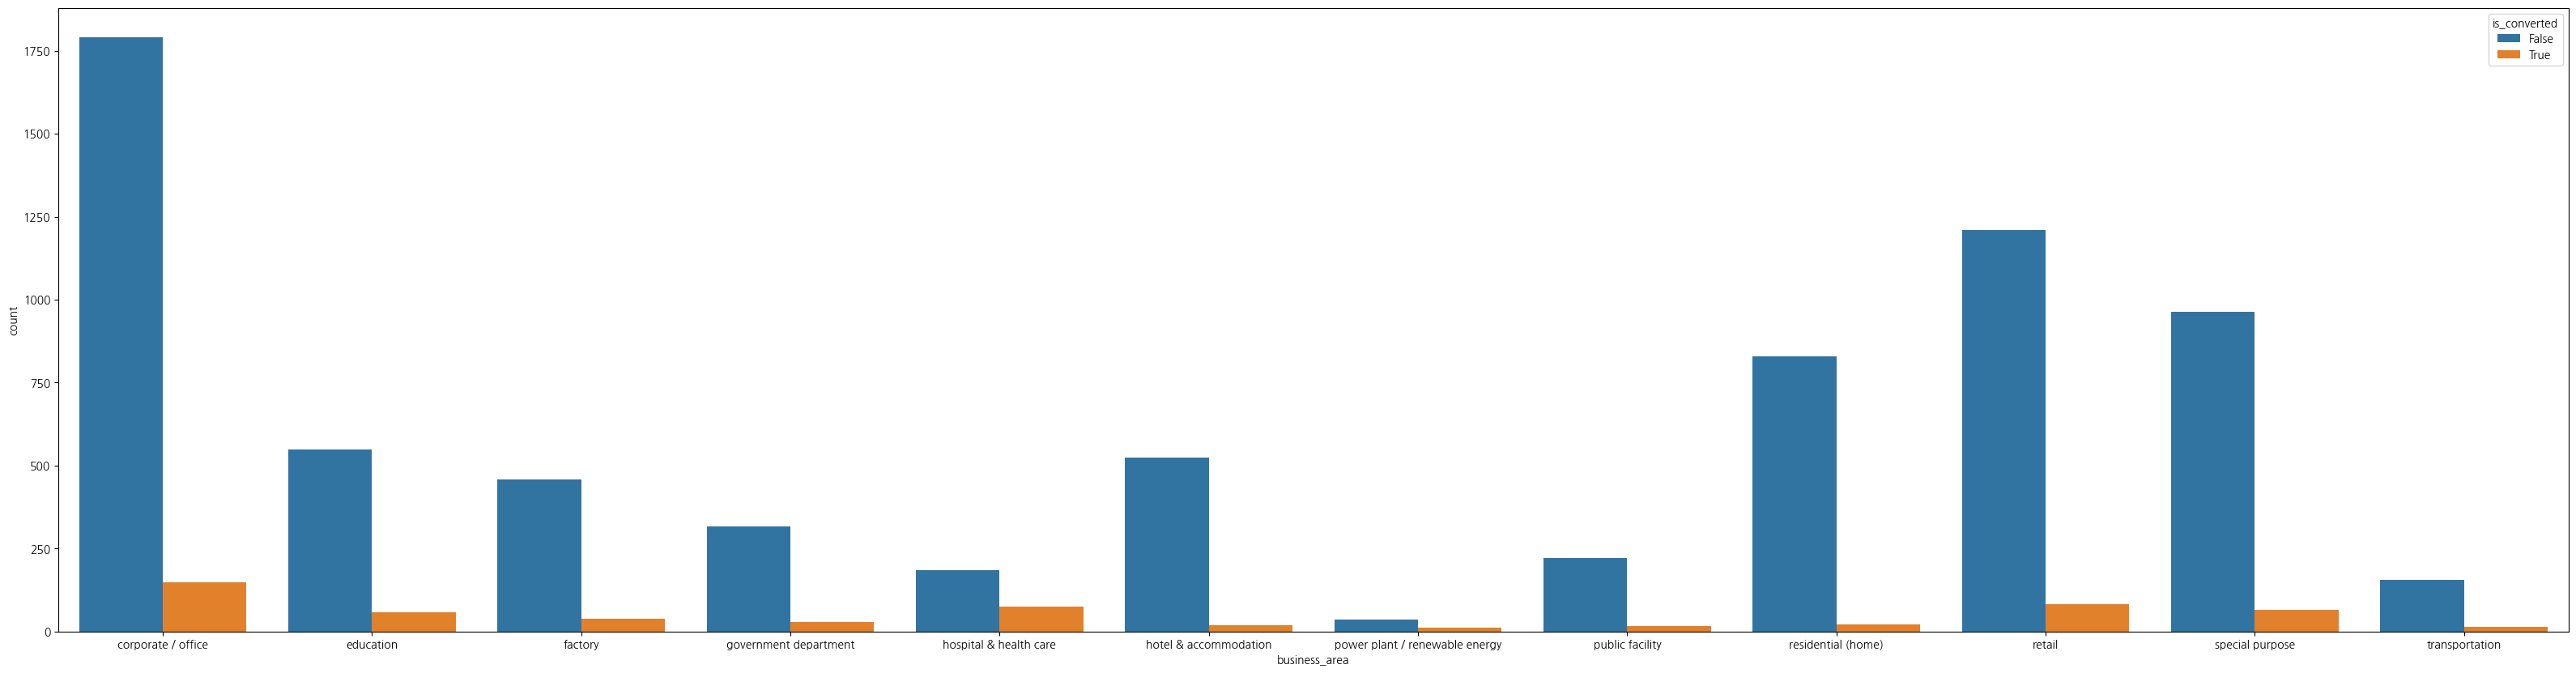

In [300]:
plt.figure(figsize=(40, 10))
sns.countplot(trn_len_75_upper.sort_values(by="business_area"), x="business_area", hue="is_converted")

<Axes: xlabel='bant_submit', ylabel='count'>

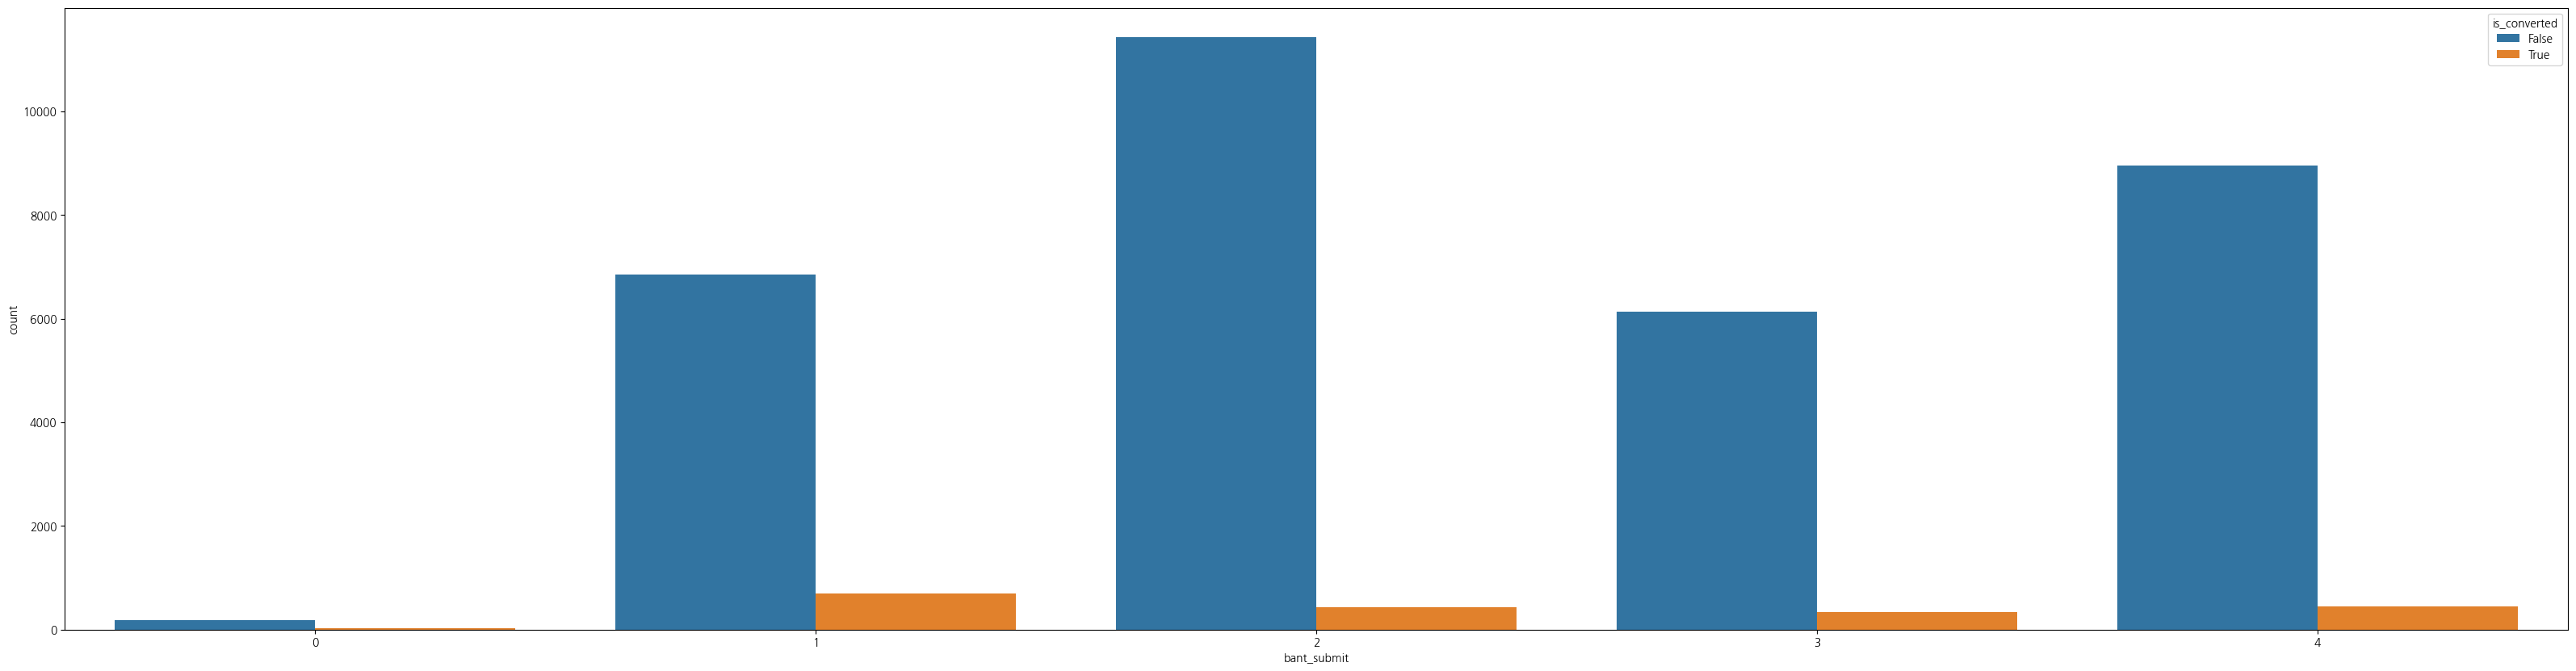

In [302]:
plt.figure(figsize=(40, 10))
sns.countplot(trn_len_75_under.sort_values(by="business_area"), x="bant_submit", hue="is_converted")

<Axes: xlabel='bant_submit', ylabel='count'>

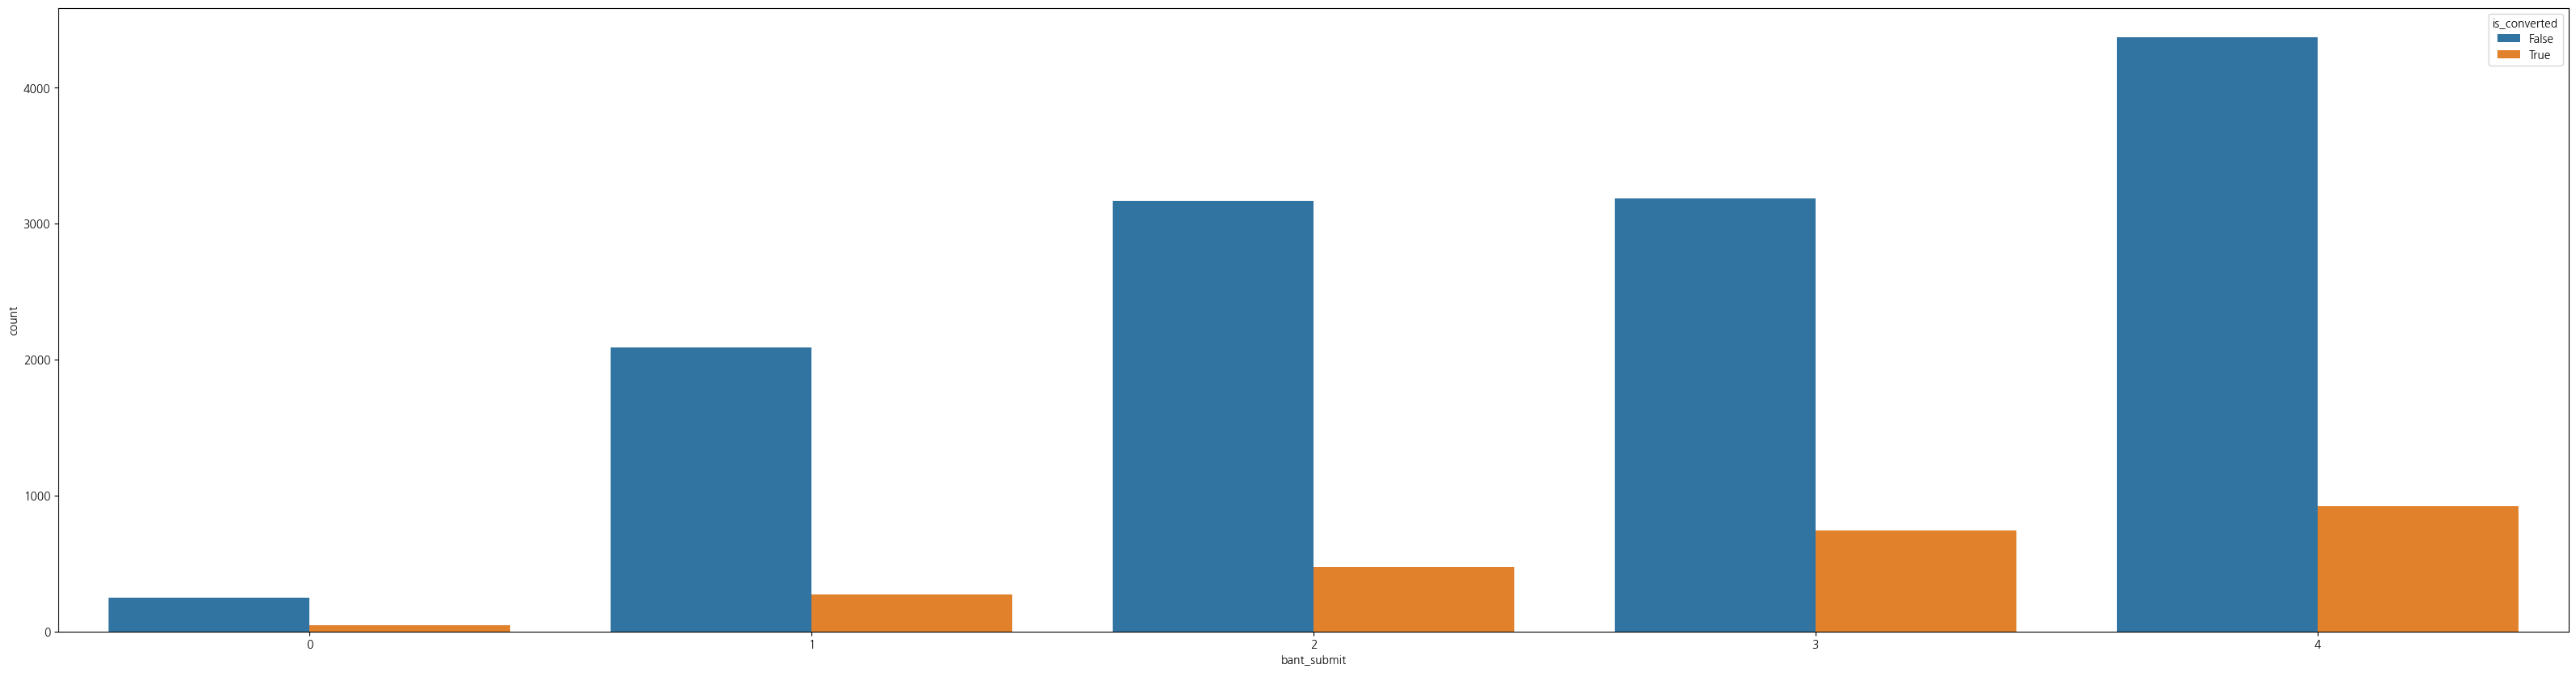

In [301]:
plt.figure(figsize=(40, 10))
sns.countplot(trn_len_75_upper.sort_values(by="business_area"), x="bant_submit", hue="is_converted")

<Axes: xlabel='bant_submit', ylabel='lead_desc_length'>

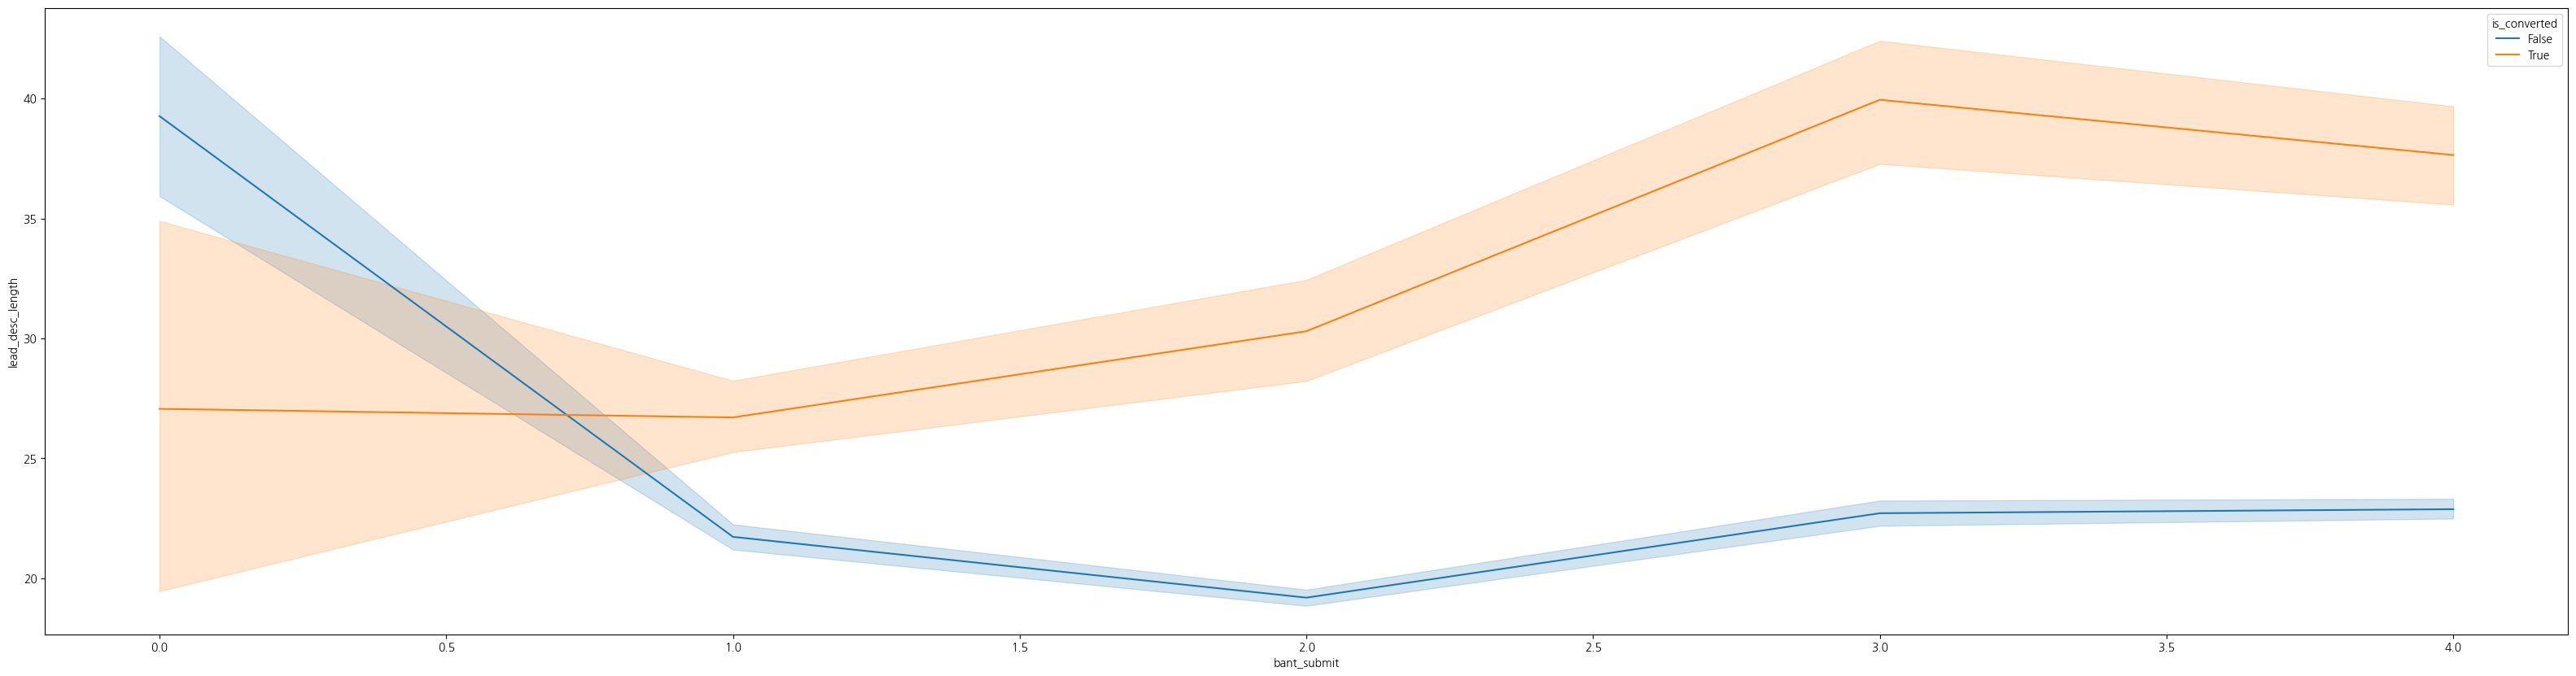

In [303]:
plt.figure(figsize=(40, 10))
sns.lineplot(trn_len_75_under, x="bant_submit", y="lead_desc_length",hue="is_converted")

<Axes: xlabel='bant_submit', ylabel='lead_desc_length'>

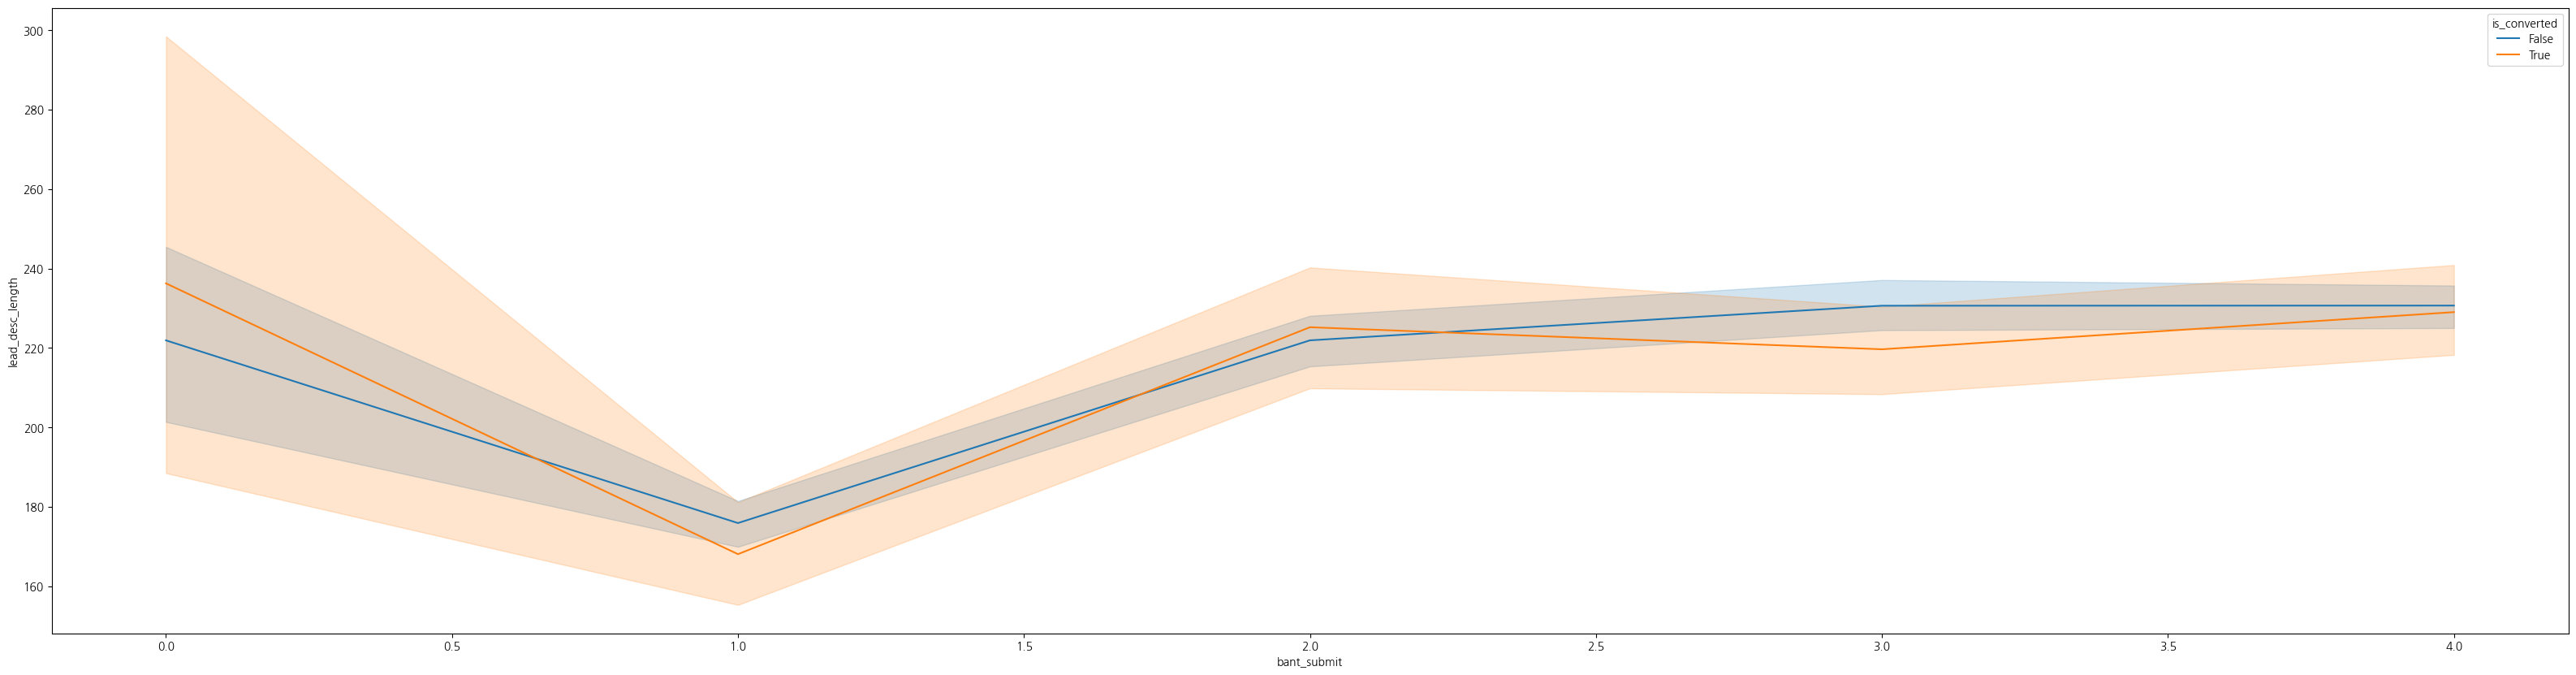

In [304]:
plt.figure(figsize=(40, 10))
sns.lineplot(trn_len_75_upper, x="bant_submit", y="lead_desc_length",hue="is_converted")

In [308]:
train[train["lead_desc_length"]<27]["is_converted"].value_counts()

is_converted
False    22633
True       830
Name: count, dtype: int64

In [309]:
train[(train["lead_desc_length"]>=27) & (train["lead_desc_length"]<75)]["is_converted"].value_counts()

is_converted
False    10795
True      1076
Name: count, dtype: int64

In [310]:
train[train["lead_desc_length"]>=75]["is_converted"].value_counts()

is_converted
False    13173
True      2481
Name: count, dtype: int64